## Table of Contents

- [I. Import Library](#I.-Import-Library)
- [II. Define the Business Objective](#II.-Define-the-Business-Objective)
- [III. Source and Collect Data](#III.-Source-and-Collect-Data)
    - [1. Check for missing data in columns and visualize them](#1.-Check-for-missing-data-in-columns)
    - [2. Select target data](#2.-Select-target-data)
    - [3. Feature classification: Categorical vs Numerical](#3.-Feature-classification:-Categorical-vs-Numerical)
- [IV. Process and Clean Data](#IV.-Process-and-Clean-Data)
    - [1. Cleaning data](#1.-Cleaning-data)
        - [1.1. Handling "Location" column](#1.1.-Handling-"Location"-column)
        - [1.2. Handling "Main technology" column](#1.2.-Handling-"Main-technology"-column)
        - [1.3. Handling "Yearly Salary" column](#1.3.-Handling-"Yearly-Salary"-column)
        - [1.4. Handling "Age" column](#1.4.-Handling-"Age"-column)
    - [2. Detecting and treating outliers](#2.-Detecting-and-treating-outliers)
        - [2.1. Handling "Yearly salary" column](#2.1.-Handling-"Yearly-salary"-column)
        - [2.2. Handling "Age" column](#2.2.-Handling-"Age"-column)
        - [2.3. Handling "Years of experience" column](#2.3.-Handling-"Years-of-experience"-column)
        - [2.4. Handling "Position" column](#2.4.-Handling-"Position"-column)
        - [2.5. Handling "Main technology" column](#2.5.-Handling-"Main-technology"-column)
- [V. Perform Exploratory Data Analysis (EDA)](#V.-Perform-Exploratory-Data-Analysis-(EDA))
    - [1. Explore Categorical Features](#1.-Explore-Categorical-Features)
    - [2. Explore Numerical Features](#2.-Explore-Numerical-Features)
    - [3. Relationship between "Yearly salary" and other Features](#3.-Relationship-between-"Yearly-salary"-and-other-Features)
        - [3.1. "Yearly Salary" vs "Age"](#3.1.-"Yearly-Salary"-vs-"Age")
        - [3.2. "Yearly salary" vs "Gender"](#3.2.-"Yearly-salary"-vs-"Gender")
        - [3.3. "Yearly salary" vs "Position"](#3.3.-"Yearly-salary"-vs-"Position")
        - [3.4. "Yearly salary" vs "Main Tecahnology"](#3.4.-"Yearly-salary"-vs-"Main-Tecahnology")
- [VI. Select, Build, and Test Models](#VI.-Select,-Build,-and-Test-Models)
    - [1. Split Independent and Dependent variables](#1.-Split-Independent-and-Dependent-variables)
    - [2. Encoding "Gender" column](#2.-Encoding-"Gender"-column)
    - [3. Apply "Label encoding" to categorical column](#3.-Apply-"Label-encoding"-to-categorical-column)
    - [4. Split a data into Training and Testing sets](#4.-Split-a-data-into-Training-and-Testing-sets)
    - [5. Build and Test Models](#5.-Build-and-Test-Models)
        - [5.1. Decision Tree Regression](#5.1.-Decision-Tree-Regression)
            - [5.1.1. Apply model](#5.1.1.-Apply-model)
            - [5.1.2. Evaluate model](#5.1.2.-Evaluate-model)
        - [5.2. Bagging techniques](#5.2.-Bagging-techniques)
            - [5.2.1. Bagging regression](#5.2.1.-Bagging-regression)
                - [5.2.1.1. Apply model](#5.2.2.1.-Apply-model)
                - [5.2.1.2. Evaluate model](#5.3.1.2.-Evaluate-model)
            - [5.2.2. Random Forest Regression](#5.2.2.-Random-Forest-Regression)
                - [5.2.2.1. Apply model](#5.2.2.1.-Apply-model)
                - [5.2.2.2. Evaluate model](#5.3.1.2.-Evaluate-model)
        - [5.3. Boosting techniques](#5.3.-Boosting-techniques)
            - [5.3.1. Gradient-Boosting-Regression](#5.3.1.-Gradient-Boosting-Regression)
                - [5.3.1.1. Apply model](#5.3.1.1.-Apply-model)
                - [5.3.1.2. Evaluate model](#5.3.1.2.-Evaluate-model)
            - [5.3.2. CatBoost Regressor](#5.3.2.-CatBoost-Regressor)
                - [5.3.2.1. Apply model](#5.3.2.1-Apply-model)
                - [5.3.2.2. Evaluate model](#5.3.2.2.-Evaluate-model)    
            - [5.3.3. XGBoost](#5.3.3.-XGBoost)
                - [5.3.3.1. Find params](#5.3.3.1.-Find-params)
                - [5.3.3.2. Apply model](#5.3.2.1-Apply-model)
                - [5.3.3.3. Evaluate model](#5.3.2.2.-Evaluate-model)
    - [6. Compare models](#6.-Compare-models)           
        - [6.1. By-Model-Evaluation-Metrics](#6.1.-By-Model-Evaluation-Metrics)
        - [6.2. By Visualization Models](#6.2.-By-Visualization-Models)
- [VII. Deploy Models](#VII.-Deploy-Models)         
    - [1. Value Categorical After Encode](#1.-Value-Categorical-After-Encode)
        - [1.1. Gender](#1.1.-Gender)
        - [1.2. Position](#1.2.-Position)
        - [1.3. Main Technology](#1.3.-Main-Technology)
    - [2. Compute Predictions Using the Tkinter GUI](#2.-Compute-Predictions-Using-the-Tkinter-GUI)

# I. Import Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# II. Define the Business Objective

In [2]:
df = pd.read_csv('IT Salary Survey EU 2019.csv')
df.head()

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 23 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Zeitstempel                                                                                           991 non-null    object 
 1   Age                                                                                                   882 non-null    float64
 2   Gender                                                                                                991 non-null    object 
 3   City                                                                                                  991 non-null    object 
 4   Seniority level                                                                                       97

## Rename columns has a space

In [4]:
# rename columns
df.rename(columns = {'Company name ':'Company name'}, inplace = True)

In [5]:
df['Сontract duration'].unique()

array(['unlimited', '6 months', nan, 'more than 1 year', '1 year',
       'less than 3 months', '3 months'], dtype=object)

# III. Source and Collect Data

## 1. Check for missing data in columns

In [6]:
for col in df.columns:
    missing_data = df[col].isna().sum()
    missing_percent = round(missing_data / len(df) * 100, 2)
    print(f"Column {col}: has {missing_percent}% missing data with {missing_data} missing entries")

Column Zeitstempel: has 0.0% missing data with 0 missing entries
Column Age: has 11.0% missing data with 109 missing entries
Column Gender: has 0.0% missing data with 0 missing entries
Column City: has 0.0% missing data with 0 missing entries
Column Seniority level: has 1.51% missing data with 15 missing entries
Column Position (without seniority): has 0.1% missing data with 1 missing entries
Column Years of experience: has 0.0% missing data with 0 missing entries
Column Your main technology / programming language: has 1.41% missing data with 14 missing entries
Column Yearly brutto salary (without bonus and stocks): has 0.1% missing data with 1 missing entries
Column Yearly bonus: has 46.52% missing data with 461 missing entries
Column Yearly stocks: has 79.52% missing data with 788 missing entries
Column Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country: has 39.15% missing data with 388 missing entries
Column Yearly bonus one year ago

,Total,Percent
0,991,100.00
Yearly stocks one year ago. Only answer if staying in same country,852,85.97
Yearly stocks,788,79.52
Company name,734,74.07
Yearly bonus one year ago. Only answer if staying in same country,734,74.07


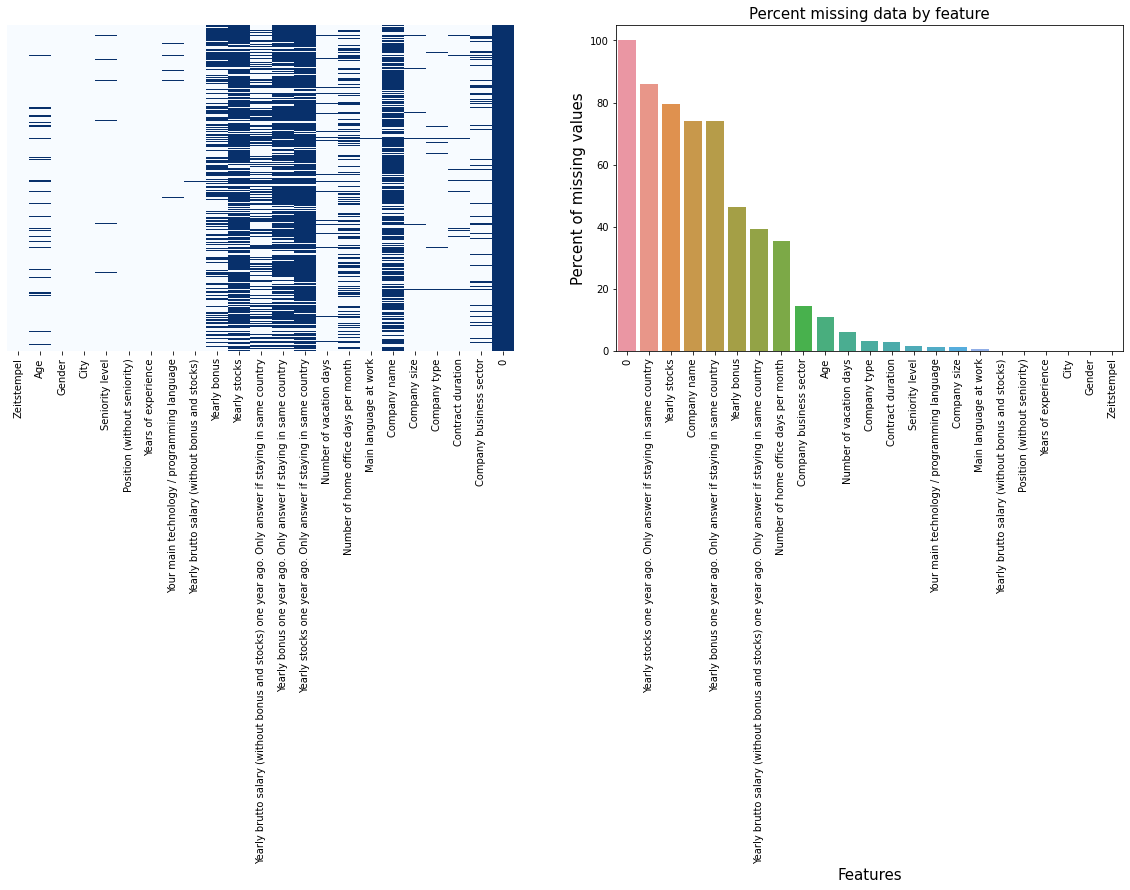

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, round(percent * 100,2)], axis=1, keys=['Total', 'Percent'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.heatmap(df.isna(), cmap="Blues", cbar=False, yticklabels=False, ax=ax[0])
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'], ax=ax[1])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15);

missing_data.head()

## 2. Select target data

In [8]:
features_not_used = ['Zeitstempel', 'Yearly stocks', 'Number of home office days per month',
                     'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country', 
                     'Yearly bonus one year ago. Only answer if staying in same country', 
                     'Yearly stocks one year ago. Only answer if staying in same country', '0', 
                     'Company name', 'Yearly bonus', 'Seniority level', 'Main language at work', 'Company business sector', 
                     'Number of vacation days', 'Company size', 'Company type', 'City', 'Сontract duration']

In [9]:
df_2019 = df.drop(columns=features_not_used)
df_2019

,Age,Gender,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks)
0,33.0,Male,Fullstack Developer,13,PHP,64000.0
1,29.0,Male,Backend Developer,3,Python,55000.0
2,NaN,Male,Mobile Developer,4,Kotlin,70000.0
3,30.0,Male,Backend Developer,6,PHP,63000.0
4,32.0,Male,Embedded Developer,10,C/C++,66000.0
...,...,...,...,...,...,...
986,30.0,Male,Backend Developer,10,Python,71000.0
987,28.0,Male,Security Engineer,7,Not Relevant,72000.0
988,42.0,Male,Manager,9,Not Relevant,68000.0
989,33.0,Male,Software Architect,15,Javascript / Typescript,100000.0


In [10]:
df_2019.rename(columns = {'Position (without seniority)': 'Position',
                     'Your main technology / programming language': 'Main technology',
                     'Yearly brutto salary (without bonus and stocks)': 'Yearly salary'}, inplace = True)
df_2019

,Age,Gender,Position,Years of experience,Main technology,Yearly salary
0,33.0,Male,Fullstack Developer,13,PHP,64000.0
1,29.0,Male,Backend Developer,3,Python,55000.0
2,NaN,Male,Mobile Developer,4,Kotlin,70000.0
3,30.0,Male,Backend Developer,6,PHP,63000.0
4,32.0,Male,Embedded Developer,10,C/C++,66000.0
...,...,...,...,...,...,...
986,30.0,Male,Backend Developer,10,Python,71000.0
987,28.0,Male,Security Engineer,7,Not Relevant,72000.0
988,42.0,Male,Manager,9,Not Relevant,68000.0
989,33.0,Male,Software Architect,15,Javascript / Typescript,100000.0


## 3. Feature classification: Categorical vs Numerical

In [11]:
# categorical features
features_cat = ['Gender', 'Position', 'Main technology']

In [12]:
# numeric features
features_num = ['Age', 'Years of experience', 'Yearly salary']

In [13]:
# check if we have captured all features
len(features_cat + features_num + features_not_used) - len(df.columns)

0

In [14]:
df_2019.describe()

,Age,Years of experience,Yearly salary
count,882.000000,991.000000,990.000000
mean,32.416100,8.529768,72562.212121
std,5.262496,5.036320,23947.379182
min,20.000000,0.000000,6000.000000
25%,29.000000,5.000000,60000.000000
50%,32.000000,8.000000,70000.000000
75%,35.000000,11.000000,80000.000000
max,54.000000,30.000000,216000.000000


In [15]:
df_2019.describe(include=['object'])

,Gender,Position,Main technology
count,991,990,977
unique,2,51,42
top,Male,Backend Developer,Python
freq,838,253,205


# IV. Process and Clean Data

## 1. Cleaning data

In [16]:
df_2019[features_cat].head()

,Gender,Position,Main technology
0,Male,Fullstack Developer,PHP
1,Male,Backend Developer,Python
2,Male,Mobile Developer,Kotlin
3,Male,Backend Developer,PHP
4,Male,Embedded Developer,C/C++


In [17]:
df_2019[features_num].head()

,Age,Years of experience,Yearly salary
0,33.0,13,64000.0
1,29.0,3,55000.0
2,NaN,4,70000.0
3,30.0,6,63000.0
4,32.0,10,66000.0


### 1.1. Handling "Location" column

In [18]:
df_2019['Position'].isna().sum()

1

In [19]:
df_2019[df_2019['Position'].isna()]

,Age,Gender,Position,Years of experience,Main technology,Yearly salary
246,NaN,Male,NaN,7,NaN,63500.0


In [20]:
df_2019.dropna(subset=['Position'], inplace=True)

In [21]:
df_2019[df_2019['Position'].isna()]

,Age,Gender,Position,Years of experience,Main technology,Yearly salary


In [22]:
position_list = list()

In [23]:
for posi in df_2019['Position']:
    position_list.append(posi.lower().strip())
df_2019['Position'] = position_list

In [24]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 990
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  882 non-null    float64
 1   Gender               990 non-null    object 
 2   Position             990 non-null    object 
 3   Years of experience  990 non-null    int64  
 4   Main technology      977 non-null    object 
 5   Yearly salary        989 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 54.1+ KB


### 1.2. Handling "Main technology" column

In [25]:
df_2019['Main technology'].isna().sum()

13

In [26]:
position_in_nan = np.array(df_2019[df_2019['Main technology'].isna()]['Position'])
position_in_nan

array(['designer (ui, ux)', 'product manager', 'manager', 'qa', 'devops',
       'manager', 'business analyst', 'lawyer', 'qa',
       'database developer (dba)', 'qa', 'ux researcher', 'devops'],
      dtype=object)

In [27]:
def find_top(data: str):
    if (df_2019[df_2019['Position'] == data]['Main technology'].value_counts().size > 0):
        result = df_2019[df_2019['Position'] == data]['Main technology'].value_counts().idxmax()
    else:
        result = 'Not Relevant'
    return result

In [28]:
tech_nan = list()
for i in position_in_nan:
    tech_nan.append(find_top(i))
    # print(i)
tech_nan

['Not Relevant',
 'Not Relevant',
 'Not Relevant',
 'Java',
 'AWS',
 'Not Relevant',
 'Not Relevant',
 'Not Relevant',
 'Java',
 'SQL',
 'Java',
 'Not Relevant',
 'AWS']

In [29]:
def assign_value(index: int, data:str):
    df_2019.at[index, 'Main technology'] = data

In [30]:
i = 0
index = df_2019[df_2019['Main technology'].isna()].index
while i < len(tech_nan):
  assign_value(index[i], tech_nan[i])
  i += 1    

In [31]:
lang_list = list()
for lang in df_2019['Main technology']:
    lang_list.append(lang.lower().strip())
df_2019['Main technology'] = lang_list

In [32]:
df_2019[df_2019['Main technology'].isna()]

,Age,Gender,Position,Years of experience,Main technology,Yearly salary


In [33]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 990
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  882 non-null    float64
 1   Gender               990 non-null    object 
 2   Position             990 non-null    object 
 3   Years of experience  990 non-null    int64  
 4   Main technology      990 non-null    object 
 5   Yearly salary        989 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 86.4+ KB


### 1.3. Handling "Yearly Salary" column

In [34]:
df_2019[df_2019['Yearly salary'].isna()]

,Age,Gender,Position,Years of experience,Main technology,Yearly salary
475,NaN,Male,backend developer,18,python,NaN


In [35]:
df_2019.dropna(subset=['Yearly salary'], inplace=True)

In [36]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 990
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  882 non-null    float64
 1   Gender               989 non-null    object 
 2   Position             989 non-null    object 
 3   Years of experience  989 non-null    int64  
 4   Main technology      989 non-null    object 
 5   Yearly salary        989 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 54.1+ KB


### 1.4. Handling "Age" column

In [37]:
df_2019['Age'].isnull().sum()

107

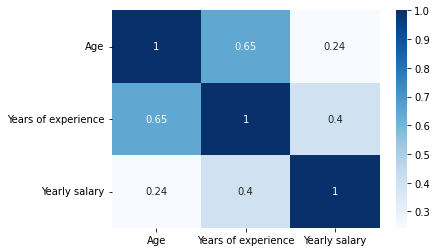

In [38]:
correlation = df_2019.corr()
sns.heatmap(data=correlation, annot=True, cmap="Blues")
plt.show()

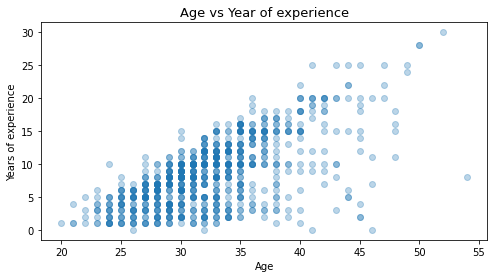

In [39]:
plt.figure(figsize=(8, 4))
plt.title('Age vs Year of experience', fontsize="13")
plt.xlabel('Age')
plt.ylabel('Years of experience')
plt.scatter(df['Age'], df['Years of experience'], alpha=0.3)
plt.show()

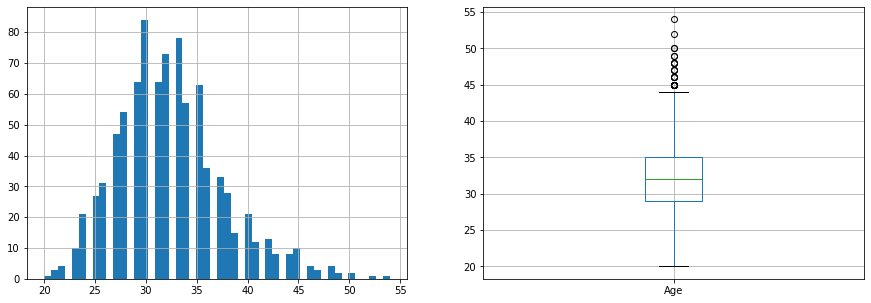

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df_2019['Age'].hist(bins=50, ax=axes[0])
df_2019['Age'].to_frame().boxplot(ax=axes[1], vert=True);

In [41]:
df_2019[df_2019['Age'] > 45]

,Age,Gender,Position,Years of experience,Main technology,Yearly salary
114,46.0,Male,system administrator,7,"microsoft, vmware",45000.0
115,46.0,Male,devops,0,kubernetes,55000.0
117,47.0,Male,embedded developer,20,c/c++,65000.0
183,48.0,Female,manager,11,not relevant,75000.0
193,47.0,Male,data engineer,22,google cloud,100000.0
208,47.0,Male,backend developer,25,.net,87600.0
223,54.0,Male,data scientist,8,r,78000.0
464,49.0,Male,manager,24,not relevant,115000.0
512,46.0,Male,fullstack developer,11,java,60000.0
603,48.0,Male,system administrator,18,powershell,55000.0


In [42]:
Xtrain = df_2019[~df_2019['Age'].isna()][['Years of experience']].values
Xtest = df_2019[df_2019['Age'].isna()][['Years of experience']].values

ytrain = df_2019[~df_2019['Age'].isna()]['Age'].values

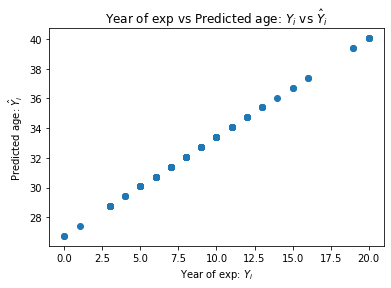

In [43]:
# Implement linear model: Age = a * (Years of experience) + b
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtrain, ytrain)

ypredict = model.predict(Xtest)

plt.scatter(Xtest, ypredict)
plt.xlabel("Year of exp: $Y_i$")
plt.ylabel("Predicted age: $\hat{Y}_i$")
plt.title("Year of exp vs Predicted age: $Y_i$ vs $\hat{Y}_i$");

In [44]:
ypredict

array([29.41238612, 32.07163374, 31.40682184, 31.40682184, 30.74200993,
       34.73088136, 30.07719803, 28.74757422, 28.74757422, 40.0493766 ,
       30.74200993, 31.40682184, 35.39569326, 34.06606945, 33.40125755,
       31.40682184, 28.74757422, 36.72531707, 34.06606945, 26.7531385 ,
       35.39569326, 30.07719803, 30.07719803, 30.07719803, 32.73644565,
       32.07163374, 30.07719803, 34.06606945, 32.73644565, 29.41238612,
       32.07163374, 33.40125755, 31.40682184, 28.74757422, 33.40125755,
       33.40125755, 32.07163374, 32.07163374, 30.74200993, 31.40682184,
       29.41238612, 30.74200993, 33.40125755, 34.06606945, 31.40682184,
       34.73088136, 34.73088136, 36.06050517, 30.74200993, 26.7531385 ,
       40.0493766 , 32.07163374, 32.07163374, 31.40682184, 28.74757422,
       31.40682184, 30.74200993, 32.07163374, 33.40125755, 31.40682184,
       40.0493766 , 31.40682184, 34.73088136, 28.74757422, 36.72531707,
       32.73644565, 37.39012898, 37.39012898, 33.40125755, 35.39

In [45]:
nan_index = df_2019[df_2019['Age'].isna()].index
df_2019.loc[nan_index, 'Age'] = ypredict

In [46]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 990
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  989 non-null    float64
 1   Gender               989 non-null    object 
 2   Position             989 non-null    object 
 3   Years of experience  989 non-null    int64  
 4   Main technology      989 non-null    object 
 5   Yearly salary        989 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 86.4+ KB


#### Group Age

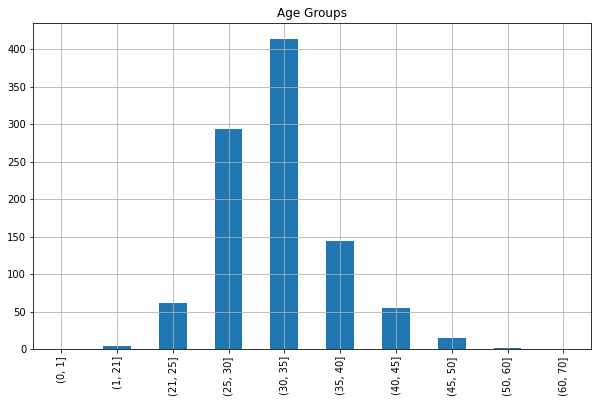

In [47]:
df_2019['AgeGroup'] = pd.cut(df_2019.Age, bins=[0,1,21,25,30,35,40,45,50,60,70])
df_2019.AgeGroup.value_counts().sort_index().plot(kind='bar', figsize=(10,6))
plt.title('Age Groups')
plt.grid()
plt.show()

## 2. Detecting and treating outliers

In [48]:
# from typing import Tuple
# from sklearn.base import BaseEstimator, TransformerMixin

# def find_boxplot_boundaries(
#     col: pd.Series, whisker_coeff: float = 1.5
# ) -> Tuple[float, float]:
#     """Findx minimum and maximum in boxplot.

#     Args:
#         col: a pandas serires of input.
#         whisker_coeff: whisker coefficient in box plot
#     """
#     Q1 = col.quantile(0.25)
#     Q3 = col.quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - whisker_coeff * IQR
#     upper = Q3 + whisker_coeff * IQR
#     return lower, upper

# class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
#     def __init__(self, whisker_coeff: float = 1.5):
#         self.whisker = whisker_coeff
#         self.lower = None
#         self.upper = None

#     def fit(self, X: pd.Series):
#         self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
#         return self

#     def transform(self, X):
#         return X.clip(self.lower, self.upper)

### 2.1. Handling "Yearly salary" column

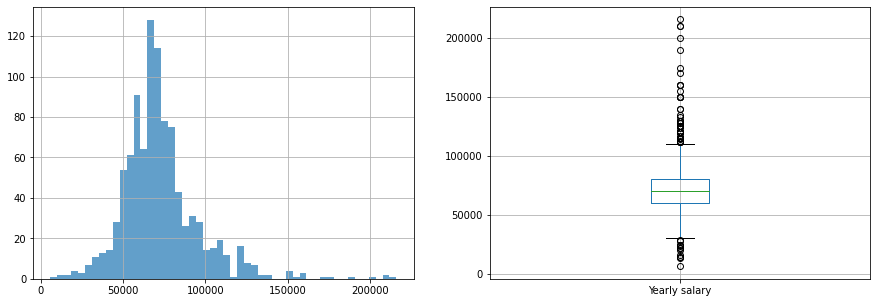

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df_2019['Yearly salary'].hist(bins=50, ax=axes[0], alpha=0.7)
df_2019['Yearly salary'].to_frame().boxplot(ax=axes[1], vert=True);

In [50]:
df_2019['Yearly salary'].describe()

count       989.000000
mean      72571.375126
std       23957.758801
min        6000.000000
25%       60000.000000
50%       70000.000000
75%       80000.000000
max      216000.000000
Name: Yearly salary, dtype: float64

In [51]:
df_2019[df_2019['Yearly salary'] < 40000].sort_values(by="Yearly salary", ascending=True).head()

,Age,Gender,Position,Years of experience,Main technology,Yearly salary,AgeGroup
940,21.0,Male,mobile developer,1,kotlin,6000.0,"(1, 21]"
272,32.0,Female,backend developer,1,aws,13200.0,"(30, 35]"
763,28.0,Male,data scientist,5,r,14000.0,"(25, 30]"
466,20.0,Male,machine learning engineer,1,python,14400.0,"(1, 21]"
952,21.0,Male,backend developer,1,java,15600.0,"(1, 21]"


In [52]:
df_2019[df_2019['Yearly salary'] > 120000].sort_values(by="Yearly salary", ascending=False).head()

,Age,Gender,Position,Years of experience,Main technology,Yearly salary,AgeGroup
499,34.730881,Male,backend developer,12,java,216000.0,"(30, 35]"
948,24.000000,Male,platform engineer,10,go,210000.0,"(21, 25]"
116,31.000000,Male,"cto (ceo, cfo)",12,java,210000.0,"(30, 35]"
823,45.000000,Female,backend developer,20,c/c++,200000.0,"(40, 45]"
37,29.000000,Male,backend developer,11,javascript / typescript,190000.0,"(25, 30]"


In [53]:
# df_2019['Yearly salary'] = BoxplotOutlierClipper().fit_transform(df_2019['Yearly salary'])

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# df_2019['Yearly salary'].hist(bins=50, ax=axes[0])
# df_2019['Yearly salary'].to_frame().boxplot(ax=axes[1], vert=True);

### 2.2. Handling "Age" column

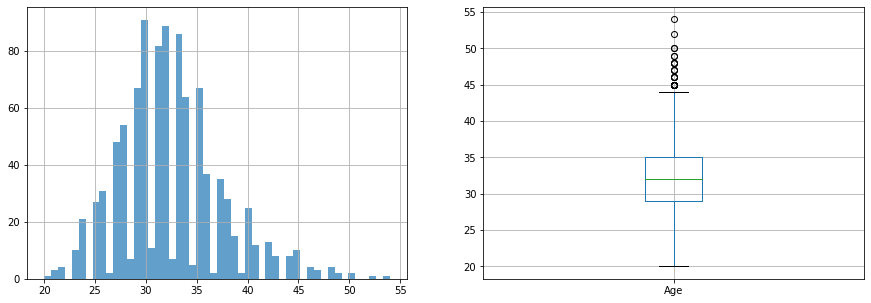

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df_2019['Age'].hist(bins=50, ax=axes[0], alpha=0.7)
df_2019['Age'].to_frame().boxplot(ax=axes[1], vert=True);

In [55]:
df_2019['Age'].describe()

count    989.000000
mean      32.418492
std        5.052154
min       20.000000
25%       29.000000
50%       32.000000
75%       35.000000
max       54.000000
Name: Age, dtype: float64

In [56]:
df_2019[df_2019['Age'] > 43].sort_values(by="Age", ascending=False)

,Age,Gender,Position,Years of experience,Main technology,Yearly salary,AgeGroup
223,54.0,Male,data scientist,8,r,78000.0,"(50, 60]"
840,52.0,Male,network engineer,30,cisco,60000.0,"(50, 60]"
961,50.0,Male,manager,28,not relevant,110000.0,"(45, 50]"
962,50.0,Male,manager,28,not relevant,110000.0,"(45, 50]"
464,49.0,Male,manager,24,not relevant,115000.0,"(45, 50]"
750,49.0,Male,devops,25,not relevant,125000.0,"(45, 50]"
632,48.0,Male,backend developer,15,java,65000.0,"(45, 50]"
766,48.0,Male,network engineer,16,cisco,67000.0,"(45, 50]"
183,48.0,Female,manager,11,not relevant,75000.0,"(45, 50]"
603,48.0,Male,system administrator,18,powershell,55000.0,"(45, 50]"


### 2.3. Handling "Years of experience" column

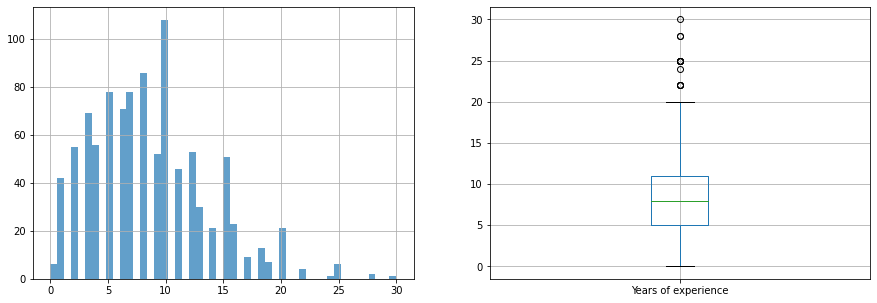

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df_2019['Years of experience'].hist(bins=50, ax=axes[0], alpha=0.7)
df_2019['Years of experience'].to_frame().boxplot(ax=axes[1], vert=True);

In [58]:
df_2019['Years of experience'].describe()

count    989.000000
mean       8.521739
std        5.032162
min        0.000000
25%        5.000000
50%        8.000000
75%       11.000000
max       30.000000
Name: Years of experience, dtype: float64

In [59]:
df_2019[df_2019['Years of experience'] > 20]

,Age,Gender,Position,Years of experience,Main technology,Yearly salary,AgeGroup
121,44.0,Male,data engineer,25,python,70000.0,"(40, 45]"
193,47.0,Male,data engineer,22,google cloud,100000.0,"(45, 50]"
208,47.0,Male,backend developer,25,.net,87600.0,"(45, 50]"
243,44.0,Male,manager,22,not relevant,107000.0,"(40, 45]"
464,49.0,Male,manager,24,not relevant,115000.0,"(45, 50]"
688,43.0,Male,backend developer,25,.net,93000.0,"(40, 45]"
750,49.0,Male,devops,25,not relevant,125000.0,"(45, 50]"
840,52.0,Male,network engineer,30,cisco,60000.0,"(50, 60]"
853,41.0,Male,data engineer,25,python,72000.0,"(40, 45]"
873,40.0,Male,software architect,22,java,95000.0,"(35, 40]"


### 2.4. Handling "Position" column

In [60]:
df_2019['Position'].value_counts()

backend developer                252
data scientist                   122
fullstack developer               78
frontend developer                68
manager                           63
qa                                56
devops                            53
mobile developer                  46
data engineer                     39
software architect                36
machine learning engineer         33
business analyst                  17
embedded developer                14
researcher                        12
product manager                   10
sap consultant                    10
sre                               10
system administrator               7
software engineer                  7
cto (ceo, cfo)                     7
cloud platform engineer            5
support                            5
designer (ui, ux)                  4
tech lead                          3
database developer (dba)           3
network engineer                   3
it security                        2
h

In [61]:
not_used_posi = ['recruiter', 'sales engineer', 'lawyer', 'localization']

In [62]:
for i in not_used_posi:
    print(df_2019[df_2019['Position'] == i])

      Age  Gender   Position  Years of experience Main technology  \
195  32.0  Female  recruiter                   10    not relevant   

     Yearly salary  AgeGroup  
195        56000.0  (30, 35]  
      Age  Gender        Position  Years of experience Main technology  \
387  35.0  Female  sales engineer                   12    not relevant   

     Yearly salary  AgeGroup  
387        46000.0  (30, 35]  
           Age Gender Position  Years of experience Main technology  \
310  31.406822   Male   lawyer                    7    not relevant   

     Yearly salary  AgeGroup  
310       170000.0  (30, 35]  
     Age Gender      Position  Years of experience Main technology  \
60  37.0   Male  localization                   15    not relevant   

    Yearly salary  AgeGroup  
60        60000.0  (35, 40]  


In [63]:
df_2019 = df_2019.drop(labels=[195, 387, 310, 60] , axis=0)

In [64]:
for i in not_used_posi:
    print(df_2019[df_2019['Position'] == i])

Empty DataFrame
Columns: [Age, Gender, Position, Years of experience, Main technology, Yearly salary, AgeGroup]
Index: []
Empty DataFrame
Columns: [Age, Gender, Position, Years of experience, Main technology, Yearly salary, AgeGroup]
Index: []
Empty DataFrame
Columns: [Age, Gender, Position, Years of experience, Main technology, Yearly salary, AgeGroup]
Index: []
Empty DataFrame
Columns: [Age, Gender, Position, Years of experience, Main technology, Yearly salary, AgeGroup]
Index: []


### 2.5. Handling "Main technology" column

In [65]:
df_2019['Main technology'].value_counts()

python                     204
java                       184
not relevant               122
javascript / typescript    107
php                         52
c/c++                       44
aws                         41
.net                        41
kotlin                      34
r                           26
swift                       20
ruby                        20
go                          15
sql                         14
scala                        9
azure                        7
kubernetes                   5
google cloud                 5
sap / abap                   4
rust                         3
sas                          2
perl                         2
objective-c                  2
elixir                       2
cisco                        2
clojure                      2
k8s                          1
postgresql                   1
hr                           1
unity                        1
erlang                       1
hadoop                       1
abap    

In [66]:
df_2019.shape

(985, 7)

In [67]:
df_2019[df_2019['Main technology'] == 'hr']

,Age,Gender,Position,Years of experience,Main technology,Yearly salary,AgeGroup
888,30.0,Female,manager,8,hr,65000.0,"(25, 30]"


In [68]:
df_2019.drop(labels=888 , axis=0, inplace=True)

In [69]:
df_2019.shape

(984, 7)

In [70]:
df_2019[df_2019['Main technology'] == 'asm']

,Age,Gender,Position,Years of experience,Main technology,Yearly salary,AgeGroup
650,29.0,Male,embedded developer,4,asm,74000.0,"(25, 30]"


In [71]:
df_2019.loc[650, "Main technology"] = "assembly"

In [72]:
df_2019[df_2019['Main technology'] == 'k8s']

,Age,Gender,Position,Years of experience,Main technology,Yearly salary,AgeGroup
907,31.0,Male,devops manager,8,k8s,85000.0,"(30, 35]"


In [73]:
df_2019.loc[907, "Main technology"] = "kubernetes"

In [74]:
a = df_2019[df_2019['Position'] == 'manager']
a[df_2019['Main technology'] == 'not relevant'].sort_values(by="Years of experience", ascending=False).head()

,Age,Gender,Position,Years of experience,Main technology,Yearly salary,AgeGroup
962,50.000000,Male,manager,28,not relevant,110000.0,"(45, 50]"
961,50.000000,Male,manager,28,not relevant,110000.0,"(45, 50]"
464,49.000000,Male,manager,24,not relevant,115000.0,"(45, 50]"
243,44.000000,Male,manager,22,not relevant,107000.0,"(40, 45]"
614,39.384565,Male,manager,19,not relevant,96000.0,"(35, 40]"


In [75]:
a[df_2019['Main technology'] != 'not relevant'].sort_values(by="Years of experience", ascending=False).head()

,Age,Gender,Position,Years of experience,Main technology,Yearly salary,AgeGroup
767,40.049377,Male,manager,20,java,90000.0,"(40, 45]"
516,37.390129,Male,manager,16,r,64000.0,"(35, 40]"
230,34.000000,Male,manager,16,php,85000.0,"(30, 35]"
517,37.390129,Male,manager,16,r,64000.0,"(35, 40]"
73,36.000000,Male,manager,15,php,80000.0,"(35, 40]"


In [76]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 990
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  984 non-null    float64 
 1   Gender               984 non-null    object  
 2   Position             984 non-null    object  
 3   Years of experience  984 non-null    int64   
 4   Main technology      984 non-null    object  
 5   Yearly salary        984 non-null    float64 
 6   AgeGroup             984 non-null    category
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 87.5+ KB


In [77]:
df_2019[df_2019['Gender'] == "Female"].value_counts().sum()

150

# V. Perform Exploratory Data Analysis (EDA)

## 1. Explore Categorical Features

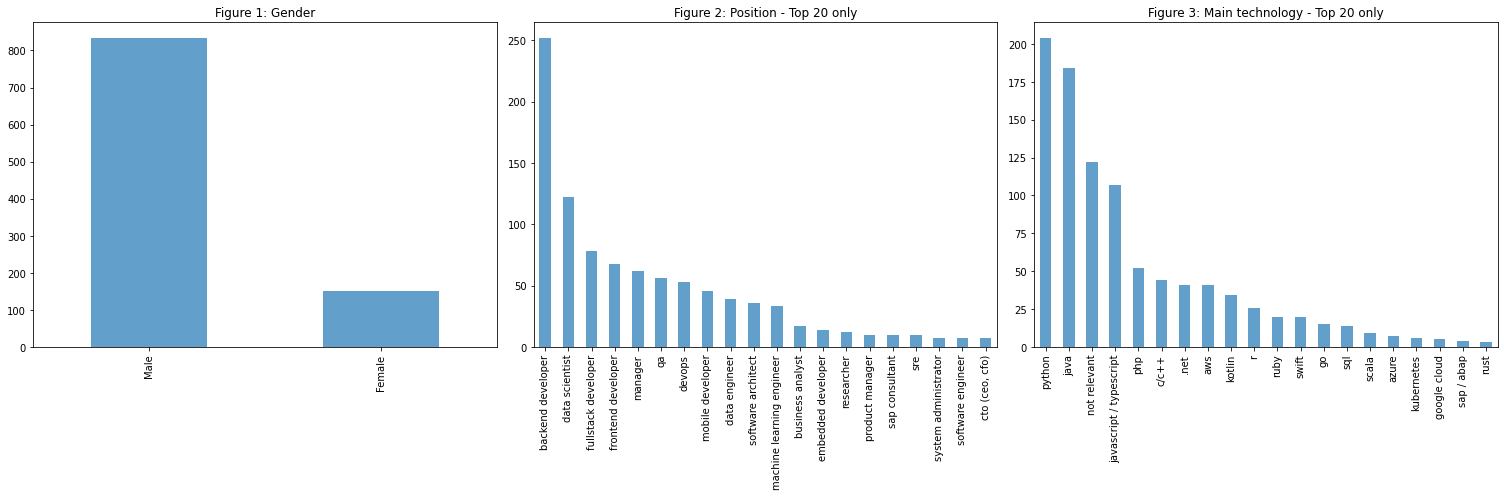

In [78]:
n_row = 1
n_cols = 3

fig, ax = plt.subplots(n_row, n_cols, figsize=(n_cols*7, n_row*7))

for r in range (0, n_row):
    for c in range (0, n_cols):
        i = r * n_cols + c
        if i < len(features_cat):
            ax_i = ax[c]
            val_c = df_2019[features_cat[c]].value_counts()
            # print(val_c[0:5])
            if len(val_c) <= 20:
                val_c.plot(kind='bar', alpha=0.7, ax = ax_i)
                ax_i.set_title(f"Figure {i+1}: " + features_cat[i])
            else:
                val_c[0:20].plot(kind='bar', alpha=0.7, ax = ax_i)
                ax_i.set_title(f"Figure {i+1}: " + features_cat[i] + ' - Top 20 only')
plt.tight_layout()

## 2. Explore Numerical Features

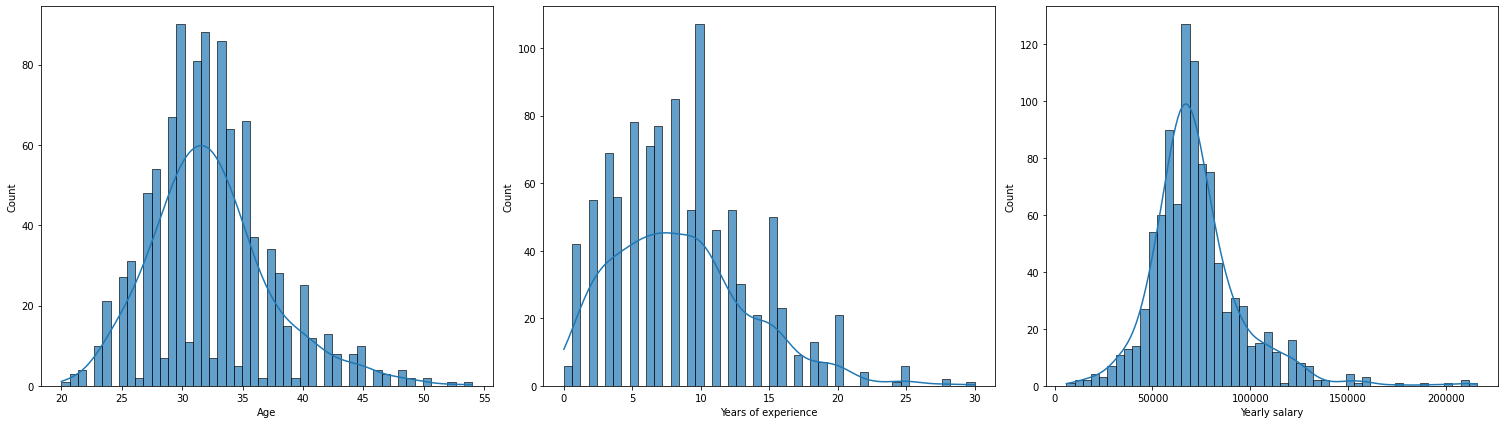

In [79]:
n_row = 1
n_cols = 3

fig, ax = plt.subplots(n_row, n_cols, figsize=(n_cols*7, n_row*6))

for r in range (0, n_row):
    for c in range (0, n_cols):
        i = r * n_cols + c
        if i < len(features_cat):
            ax_i = ax[c]
            sns.histplot(data=df_2019, x=features_num[c], bins = 50, ax = ax_i, kde=True, alpha=0.7)
plt.tight_layout()

## 3. Relationship between "Yearly salary" and other Features

In [80]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 990
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  984 non-null    float64 
 1   Gender               984 non-null    object  
 2   Position             984 non-null    object  
 3   Years of experience  984 non-null    int64   
 4   Main technology      984 non-null    object  
 5   Yearly salary        984 non-null    float64 
 6   AgeGroup             984 non-null    category
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 87.5+ KB


### 3.1. "Yearly Salary" vs "Age"

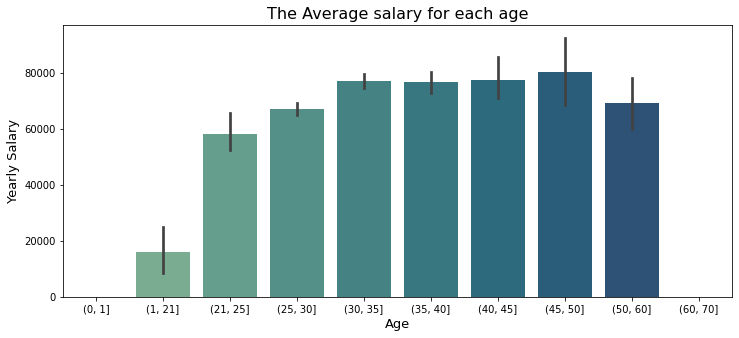

In [81]:
plt.figure(figsize=(12, 5))
sns.barplot(data = df_2019, x='AgeGroup', y='Yearly salary', palette='crest')
plt.title('The Average salary for each age', fontsize= 16)
plt.xlabel('Age', fontsize= 13)
plt.ylabel('Yearly Salary', fontsize = 13)
plt.show();

### 3.2. "Yearly salary" vs "Gender"

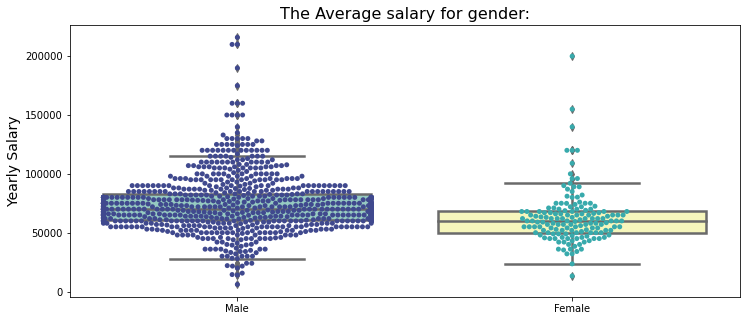

In [82]:
salary = 'Yearly salary'

plt.figure(figsize=(12,5)) 
ax = sns.boxplot(x='Gender', y=salary, data=df_2019, palette='Set3', linewidth=2.5)
ax = sns.swarmplot(x='Gender',y=salary,data=df_2019, palette='mako')

plt.title('The Average salary for gender:', fontsize= 16)
plt.xlabel('', fontsize= 14)
plt.ylabel('Yearly Salary', fontsize = 14)
plt.show()

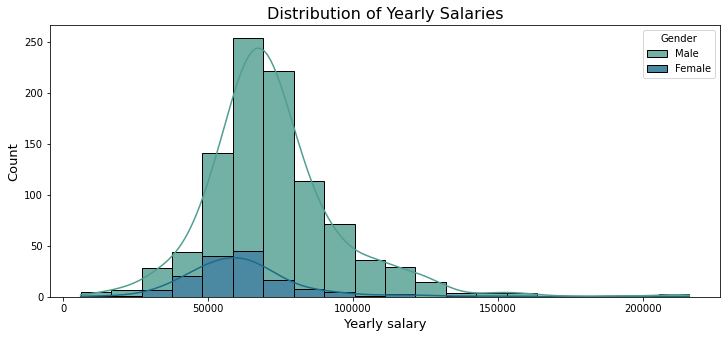

In [83]:
plt.figure(figsize=(12,5))
sns.histplot(x='Yearly salary',data=df_2019,
             bins=20, kde=True, hue='Gender',multiple="stack",palette='crest',alpha=0.8)

plt.title('Distribution of Yearly Salaries', fontsize= 16)
plt.xlabel("Yearly salary",fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.show()

### 3.3. "Yearly salary" vs "Position"

In [84]:
position_earning = df_2019['Yearly salary'].groupby(df_2019['Position']).sum()
position_earning.sort_values(ascending=False,inplace=True)
position_earning.head(10)

Position
backend developer            18187935.0
data scientist                8992100.0
fullstack developer           5340349.0
manager                       5040400.0
frontend developer            4321860.0
devops                        3928000.0
qa                            3484900.0
software architect            3375600.0
mobile developer              3096500.0
machine learning engineer     2683100.0
Name: Yearly salary, dtype: float64

In [85]:
top_position = position_earning.iloc[:10].index.to_list()
avr_earning = (position_earning / df_2019['Position'].value_counts()).sort_values(ascending = False)
result = list()

for position in top_position:
    print(position,": ",round(avr_earning[position],2))
    result.append([position, round(avr_earning[position],2)])

backend developer :  72174.35
data scientist :  73705.74
fullstack developer :  68466.01
manager :  81296.77
frontend developer :  63556.76
devops :  74113.21
qa :  62230.36
software architect :  93766.67
mobile developer :  67315.22
machine learning engineer :  81306.06


In [86]:
avg_salary_position = pd.DataFrame(result,columns = ['Position', 'Yearly salary'])
avg_salary_position[['Position', 'Yearly salary']]

,Position,Yearly salary
0,backend developer,72174.35
1,data scientist,73705.74
2,fullstack developer,68466.01
3,manager,81296.77
4,frontend developer,63556.76
5,devops,74113.21
6,qa,62230.36
7,software architect,93766.67
8,mobile developer,67315.22
9,machine learning engineer,81306.06


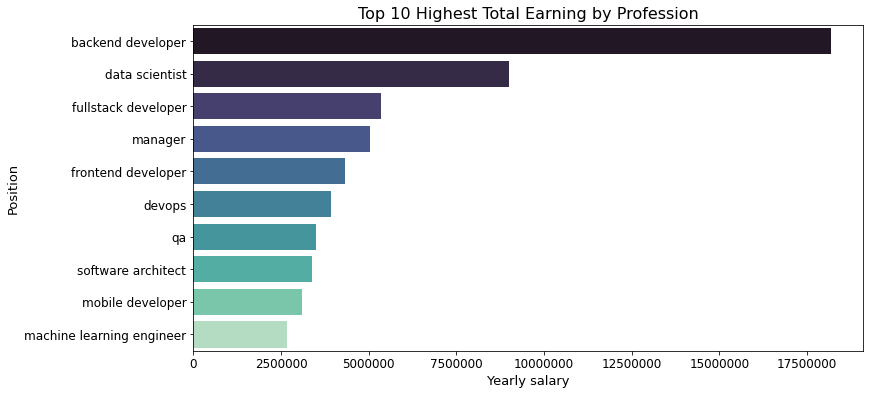

In [87]:
# Top 10 Highest Total Earning by Profession
plt.figure(figsize=(12,6))
position_earning = position_earning.to_frame()

sns.barplot(data = position_earning, y = position_earning.index[:10],
            x = position_earning['Yearly salary'].iloc[:10], palette='mako')

plt.ticklabel_format(style='plain', axis='x')
plt.title('Top 10 Highest Total Earning by Profession', fontsize= 16)
plt.xlabel("Yearly salary",fontsize=13)
plt.ylabel("Position",fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)  
plt.show()

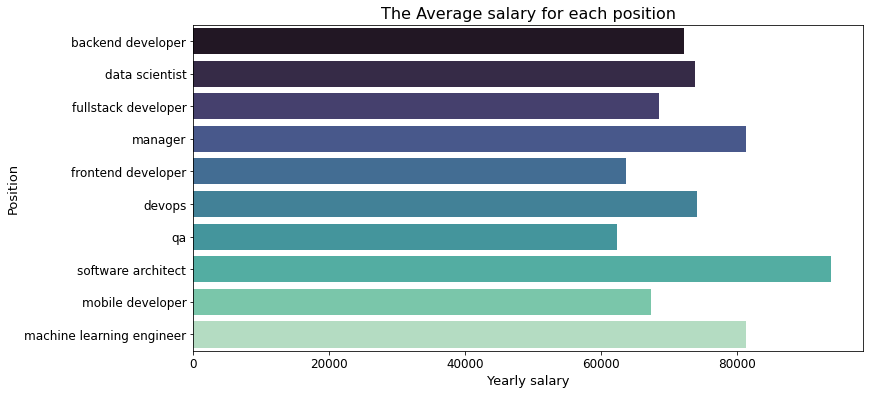

In [88]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=avg_salary_position, y=position_earning.index[:10],
            x = avg_salary_position['Yearly salary'], palette='mako')

plt.ticklabel_format(style='plain', axis='x')
plt.title('The Average salary for each position', fontsize= 16)
plt.xlabel("Yearly salary",fontsize=13)
plt.ylabel("Position",fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)  
plt.show()

### 3.4. "Yearly salary" vs "Main Tecahnology"

In [89]:
# Top 15 Salary and Technology
modi_new_df = df_2019.copy()
modi_new_df['Main technology'] = modi_new_df['Main technology'].str.lower()
modi_new_df['Main technology'] = modi_new_df['Main technology'].str.strip()

top_tech_sal = modi_new_df['Yearly salary'].groupby(modi_new_df['Main technology']).sum().sort_values(ascending=False).index.to_list()[0:15]
top_tech_sal

['python',
 'java',
 'not relevant',
 'javascript / typescript',
 'php',
 'c/c++',
 'aws',
 '.net',
 'kotlin',
 'r',
 'swift',
 'ruby',
 'go',
 'sql',
 'scala']

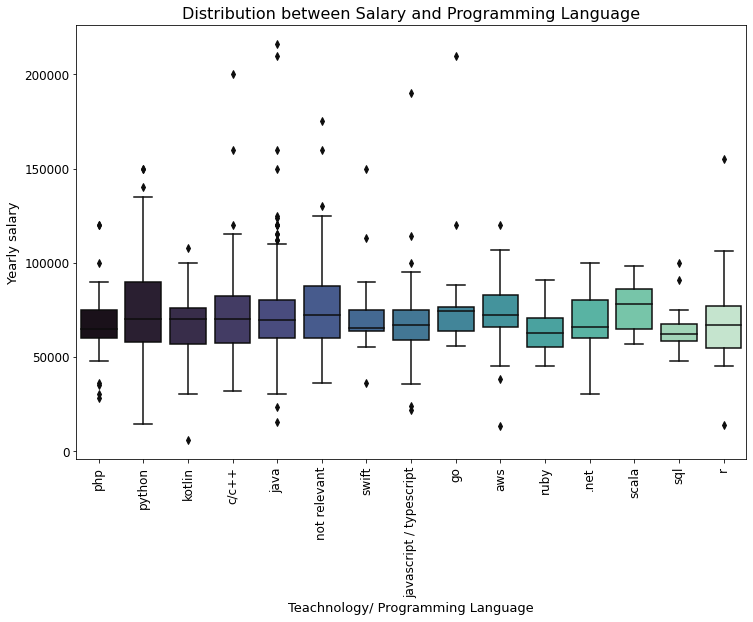

In [90]:
# Boxplot Salary and Programming Language
data = modi_new_df[modi_new_df['Main technology'].isin(top_tech_sal)]

plt.figure(figsize=(12,8))
sns.boxplot(data=data, y='Yearly salary',  x='Main technology', palette='mako')

plt.title('Distribution between Salary and Programming Language', fontsize= 16)
plt.xlabel('Teachnology/ Programming Language',fontsize=13)
plt.ylabel("Yearly salary",fontsize=13)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12)  
plt.show();

In [91]:
# Backend Developer and Main Programming Language
from collections import Counter
bd_raw_pro = modi_new_df[modi_new_df['Position'] == 'backend developer']['Main technology'].dropna().to_list()
bd_pro_list = list()

for langs in bd_raw_pro:
    langs = langs.strip().replace(", ",",").replace("/",",").replace(" ",",").lower().split(",")
    for lang in langs:
        bd_pro_list.append(lang)

bd_pro_df = pd.DataFrame.from_dict(Counter(bd_pro_list),orient='index')
bd_pro_df.columns = ['Count']
bd_pro_df.sort_values(by='Count',ascending=False,inplace=True)
bd_pro_df.drop(index="",inplace=True)
bd_pro_df.head(10)

,Count
java,104
php,34
python,23
.net,19
ruby,16
c,15
c++,15
javascript,10
typescript,10
go,7


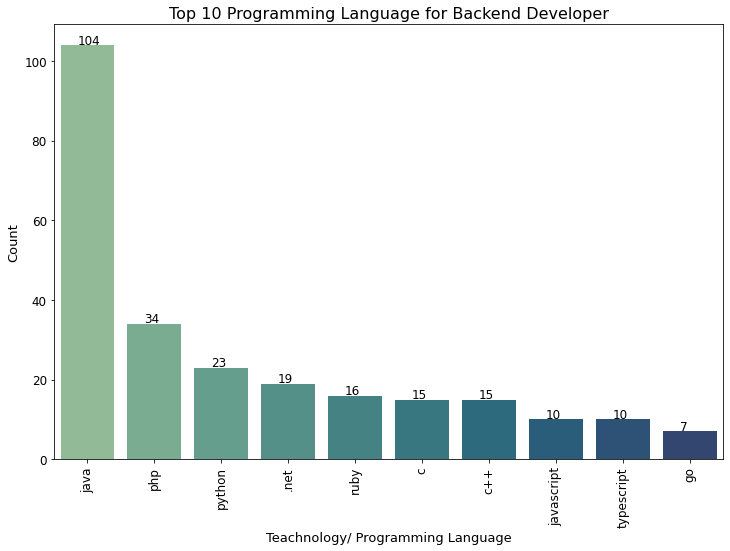

In [92]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=bd_pro_df.head(10), x=bd_pro_df.iloc[:10].index,
            y=bd_pro_df['Count'].iloc[:10], palette='crest')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+0.25, p.get_height()+0.3), fontsize=12)

plt.title('Top 10 Programming Language for Backend Developer', fontsize= 16)
plt.xlabel('Teachnology/ Programming Language',fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12)
plt.show()

In [93]:
# Data Scientist and Main Programming Language
ds_raw_pro = modi_new_df[modi_new_df['Position'] == 'data scientist']['Main technology'].dropna().to_list()
ds_pro_list = list()

for langs in ds_raw_pro:
        ds_pro_list.append(langs)

ds_pro_df = pd.DataFrame.from_dict(Counter(ds_pro_list),orient='index')
ds_pro_df.columns = ['Count']
ds_pro_df.sort_values(by='Count',ascending=False,inplace = True)
ds_pro_df.head(10)

,Count
python,93
r,21
not relevant,3
sql,2
kotlin,1
scala,1
sas,1


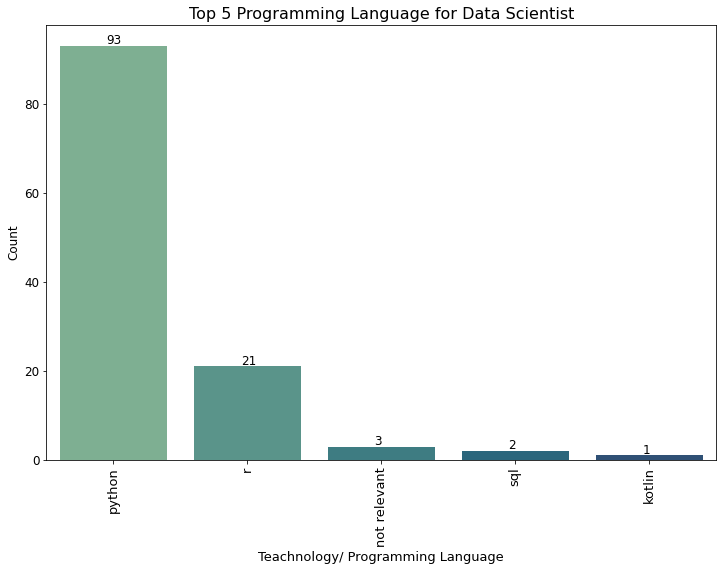

In [94]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=ds_pro_df.head(5), x=ds_pro_df.iloc[:5].index,
            y=ds_pro_df['Count'].iloc[:5], palette='crest')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+0.35, p.get_height()+0.4), fontsize=12)

plt.title('Top 5 Programming Language for Data Scientist', fontsize= 16)
plt.xlabel('Teachnology/ Programming Language', fontsize=13)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=13, rotation = 90)
plt.yticks(fontsize=12)
plt.show()

# VI. Select, Build, and Test Models

## 1. Split Independent and Dependent variables

In [95]:
df_2019[features_cat].head()

,Gender,Position,Main technology
0,Male,fullstack developer,php
1,Male,backend developer,python
2,Male,mobile developer,kotlin
3,Male,backend developer,php
4,Male,embedded developer,c/c++


In [96]:
df_2019[features_num].head()

,Age,Years of experience,Yearly salary
0,33.000000,13,64000.0
1,29.000000,3,55000.0
2,29.412386,4,70000.0
3,30.000000,6,63000.0
4,32.000000,10,66000.0


In [97]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 990
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  984 non-null    float64 
 1   Gender               984 non-null    object  
 2   Position             984 non-null    object  
 3   Years of experience  984 non-null    int64   
 4   Main technology      984 non-null    object  
 5   Yearly salary        984 non-null    float64 
 6   AgeGroup             984 non-null    category
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 87.5+ KB


In [98]:
features = ['Age', 'Years of experience', 'Gender', 'Position', 'Main technology']

In [99]:
X = df_2019[features]
y = df_2019['Yearly salary']

In [100]:
X.head()

,Age,Years of experience,Gender,Position,Main technology
0,33.000000,13,Male,fullstack developer,php
1,29.000000,3,Male,backend developer,python
2,29.412386,4,Male,mobile developer,kotlin
3,30.000000,6,Male,backend developer,php
4,32.000000,10,Male,embedded developer,c/c++


In [101]:
y.head()

0    64000.0
1    55000.0
2    70000.0
3    63000.0
4    66000.0
Name: Yearly salary, dtype: float64

## 2. Encoding "Gender" column

In [102]:
# https://viblo.asia/p/feature-engineering-phan-3-feature-engineering-voi-du-lieu-dang-phan-loai-categorical-data-GrLZDQx2lk0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender Encoded'] = le.fit_transform(X['Gender'])
cGender = X['Gender'].unique()
cGenderEnc = X['Gender Encoded'].unique()
X = X.drop(columns=['Gender'])
X

,Age,Years of experience,Position,Main technology,Gender Encoded
0,33.000000,13,fullstack developer,php,1
1,29.000000,3,backend developer,python,1
2,29.412386,4,mobile developer,kotlin,1
3,30.000000,6,backend developer,php,1
4,32.000000,10,embedded developer,c/c++,1
...,...,...,...,...,...
986,30.000000,10,backend developer,python,1
987,28.000000,7,security engineer,not relevant,1
988,42.000000,9,manager,not relevant,1
989,33.000000,15,software architect,javascript / typescript,1


## 3. Apply "Label encoding" to categorical column

In [103]:
X

,Age,Years of experience,Position,Main technology,Gender Encoded
0,33.000000,13,fullstack developer,php,1
1,29.000000,3,backend developer,python,1
2,29.412386,4,mobile developer,kotlin,1
3,30.000000,6,backend developer,php,1
4,32.000000,10,embedded developer,c/c++,1
...,...,...,...,...,...
986,30.000000,10,backend developer,python,1
987,28.000000,7,security engineer,not relevant,1
988,42.000000,9,manager,not relevant,1
989,33.000000,15,software architect,javascript / typescript,1


In [104]:
X.describe(include=['object'])

,Position,Main technology
count,984,984
unique,45,40
top,backend developer,python
freq,252,204


In [105]:
X_lb = X
X_lb['Position Encoded'] = le.fit_transform(X_lb['Position'])
X_lb['Main technology Encoded'] = le.fit_transform(X_lb['Main technology'])
cPosition = X_lb['Position'].unique()
cPositionEnc = X_lb['Position Encoded'].unique()
cMaintech = X_lb['Main technology'].unique()
cMaintechEnc = X_lb['Main technology Encoded'].unique()

X_lb = X_lb.drop(columns=['Position', 'Main technology'])
X = X.drop(columns=['Position Encoded', 'Main technology Encoded'])
X_lb

,Age,Years of experience,Gender Encoded,Position Encoded,Main technology Encoded
0,33.000000,13,1,17,25
1,29.000000,3,1,0,28
2,29.412386,4,1,25,16
3,30.000000,6,1,0,25
4,32.000000,10,1,15,5
...,...,...,...,...,...
986,30.000000,10,1,0,28
987,28.000000,7,1,36,21
988,42.000000,9,1,24,21
989,33.000000,15,1,37,15


In [106]:
y_lb = y

## 4. Split a data into Training and Testing sets

In [107]:
from sklearn.model_selection import train_test_split
X_train_lb, X_test_lb, y_train_lb, y_test_lb = train_test_split(X_lb, y_lb, test_size = 0.2, random_state = 6)

### Feature scalling for independent variable

In [108]:
# https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
# https://www.atoti.io/articles/when-to-perform-a-feature-scaling/
# https://stackabuse.com/feature-scaling-data-with-scikit-learn-for-machine-learning-in-python/

# demonstrate data standardization with sklearn
# from sklearn.preprocessing import StandardScaler
# # create scaler
# scaler = StandardScaler()
# # fit and transform in one step
# X_train_lb[['Age', 'Years of experience']] = scaler.fit_transform(X_train_lb[['Age', 'Years of experience']])
# X_test_lb[['Age', 'Years of experience']] = scaler.transform(X_test_lb[['Age', 'Years of experience']])
# print(X_train_lb.shape, X_test_lb.shape)

In [109]:
X_train_lb.head()

,Age,Years of experience,Gender Encoded,Position Encoded,Main technology Encoded
657,30.000000,9,1,24,0
251,34.066069,11,1,31,21
205,29.000000,8,1,17,14
207,28.000000,4,1,8,21
653,32.000000,10,1,8,28


### Feature scalling for dependent variable

In [110]:
# y_train_lb = y_train_lb.values.reshape(len(y_train_lb), 1)
# y_test_lb = y_test_lb.values.reshape(len(y_test_lb), 1)

In [111]:
# y_train_lb = scaler.fit_transform(y_train_lb)
# y_test_lb = scaler.transform(y_test_lb)

## 5. Build and Test Models

### 5.1. Decision Tree Regression

#### 5.1.1. Apply model

In [112]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-algorithms-along-with-their-implementation-in-python-9ec502729dad
# https://machinelearningmastery.com/regression-metrics-for-machine-learning/

In [113]:
# https://www.saedsayad.com/decision_tree_reg.htm
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

start = time.time()
model_lb = tree.DecisionTreeRegressor(random_state=6).fit(X_train_lb, y_train_lb)
predict_lb = model_lb.predict(X_test_lb)
end = time.time()

print('Điểm trên tập train: ', model_lb.score(X_train_lb, y_train_lb))
print('Điểm trên tập test:', model_lb.score(X_test_lb, y_test_lb))
print("Run time:", end - start, "s")

Điểm trên tập train:  0.9806965903119123
Điểm trên tập test: 0.033884952878844965
Run time: 0.0312960147857666 s


In [114]:
# # https://stackoverflow.com/questions/47213483/how-to-visualize-a-regression-tree-in-python
# # Generate tree
# import graphviz 
# dot_data = tree.export_graphviz(model_lb, out_file='tree.dot') 

#### 5.1.2. Evaluate model

In [115]:
from sklearn.metrics import mean_absolute_error
mae_dtr = mean_absolute_error(y_test_lb, predict_lb)
print("MAE: ", mae_dtr)

MAE:  16728.10998307953


In [116]:
from sklearn.metrics import mean_squared_error
mse_dtr = mean_squared_error(y_test_lb, predict_lb)
rmse_dtr = np.sqrt(mean_squared_error(y_test_lb, predict_lb))
print("MSE: ", mse_dtr)
print("RMSE: ", rmse_dtr)

MSE:  546740941.9768753
RMSE:  23382.492210559492


In [117]:
from sklearn.metrics import r2_score
r2_dtr = r2_score(y_test_lb, predict_lb)
print("R2: ", r2_dtr)

R2:  0.033884952878844965


In [118]:
pd.DataFrame({'y': y_test_lb, 'y_pre': predict_lb, 'diff': predict_lb - y_test_lb}).head(10)

,y,y_pre,diff
405,36000.0,45000.0,9000.0
295,62000.0,65000.0,3000.0
408,58000.0,57000.0,-1000.0
907,85000.0,68000.0,-17000.0
233,62000.0,61750.0,-250.0
658,67000.0,98000.0,31000.0
17,87000.0,90000.0,3000.0
445,72000.0,95000.0,23000.0
188,60000.0,78000.0,18000.0
55,72000.0,42000.0,-30000.0


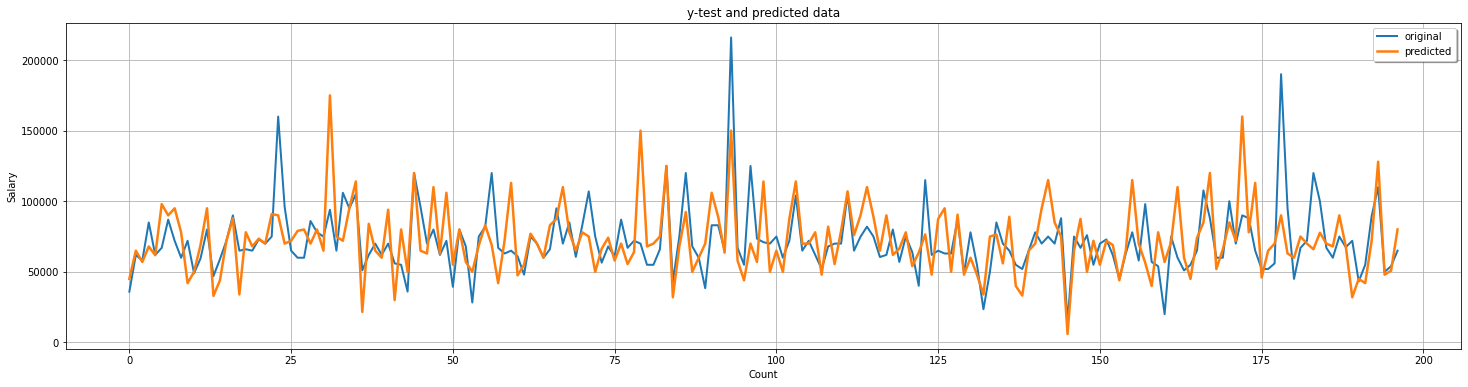

In [119]:
x_ax = range(len(y_test_lb))
plt.figure(figsize=(25, 6))
plt.plot(x_ax, y_test_lb, linewidth=2, label="original")
plt.plot(x_ax, predict_lb, linewidth=2.5, label="predicted")
plt.title("y-test and predicted data")
plt.xlabel('Count')
plt.ylabel('Salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### 5.2. Bagging techniques

#### 5.2.1. Bagging regression

##### 5.2.1.1. Apply Model

In [120]:
# https://machinelearningmastery.com/bagging-ensemble-with-python/
# https://viblo.asia/p/ensemble-learning-va-cac-bien-the-p1-WAyK80AkKxX

from sklearn.ensemble import BaggingRegressor

start = time.time()
model_br = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20), n_estimators=100,random_state=6)
model_br.fit(X_train_lb, y_train_lb)
predict_lb_br = model_br.predict(X_test_lb)
end = time.time()

print('Điểm trên tập train: ', model_br.score(X_train_lb, y_train_lb))
print('Điểm trên tập test:', model_br.score(X_test_lb, y_test_lb))
print("Run time:", end - start, "s")

Điểm trên tập train:  0.8800515503767525
Điểm trên tập test: 0.38127741438297813
Run time: 0.2697265148162842 s


##### 5.2.1.2. Evaluate model

In [121]:
from sklearn.metrics import mean_absolute_error
mae_br = mean_absolute_error(y_test_lb, predict_lb_br)
print("MAE: ", mae_br)

MAE:  12263.673995765306


In [122]:
from sklearn.metrics import mean_squared_error
mse_br = mean_squared_error(y_test_lb, predict_lb_br)
rmse_br = np.sqrt(mean_squared_error(y_test_lb, predict_lb_br))
print("MSE: ", mse_br)
print("RMSE: ", rmse_br)

MSE:  350145637.71740586
RMSE:  18712.178860768883


In [123]:
from sklearn.metrics import r2_score
r2_br = r2_score(y_test_lb, predict_lb_br)
print("R2: ", r2_br)

R2:  0.38127741438297813


In [124]:
pd.DataFrame({'y': y_test_lb, 'y_pre': predict_lb_br, 'diff': predict_lb_br - y_test_lb}).head(10)

,y,y_pre,diff
405,36000.0,46566.000000,10566.000000
295,62000.0,66523.000000,4523.000000
408,58000.0,55713.333333,-2286.666667
907,85000.0,73589.261905,-11410.738095
233,62000.0,53386.250000,-8613.750000
658,67000.0,91901.190476,24901.190476
17,87000.0,84271.483218,-2728.516782
445,72000.0,81133.000000,9133.000000
188,60000.0,71894.750000,11894.750000
55,72000.0,54280.200000,-17719.800000


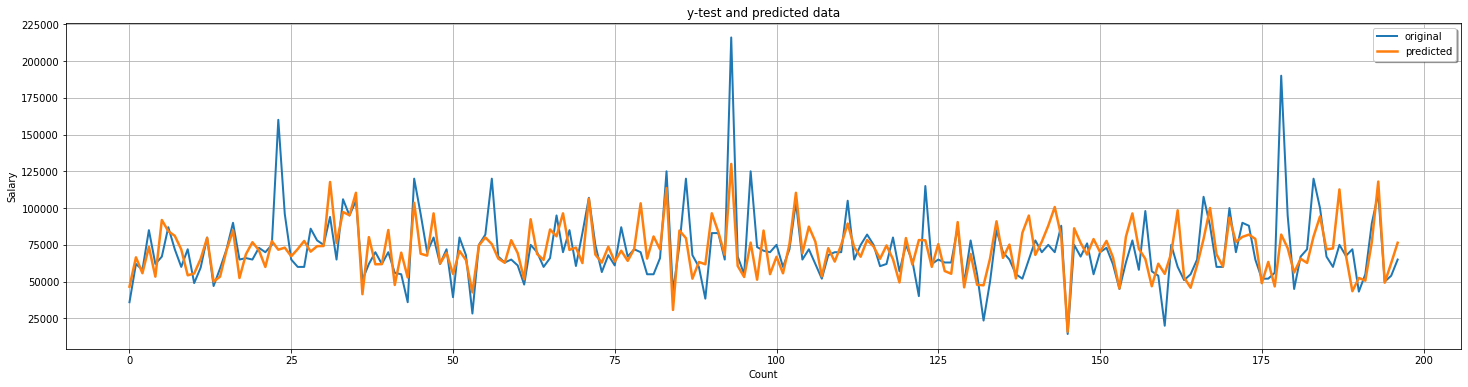

In [125]:
x_ax = range(len(y_test_lb))
plt.figure(figsize=(25, 6))
plt.plot(x_ax, y_test_lb, linewidth=2, label="original")
plt.plot(x_ax, predict_lb_br, linewidth=2.5, label="predicted")
plt.title("y-test and predicted data")
plt.xlabel('Count')
plt.ylabel('Salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#### 5.2.2. Random Forest Regression

##### 5.2.2.1. Apply model

In [126]:
#https://towardsdatascience.com/random-forest-regression-5f605132d19d
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

start = time.time()
model_lb_rdf = RandomForestRegressor(random_state=6).fit(X_train_lb, y_train_lb)
predict_lb_rdf = model_lb_rdf.predict(X_test_lb)
end = time.time()

print('Điểm trên tập train: ', model_lb_rdf.score(X_train_lb, y_train_lb))
print('Điểm trên tập test:', model_lb_rdf.score(X_test_lb, y_test_lb))
print("Run time:", end - start, "s")

Điểm trên tập train:  0.8806431312004595
Điểm trên tập test: 0.3719876408960129
Run time: 0.28502440452575684 s


##### 5.2.2.2. Evaluate model

In [127]:
from sklearn.metrics import mean_absolute_error
mae_rdf = mean_absolute_error(y_test_lb, predict_lb_rdf)
print("MAE", mae_rdf)

MAE 12393.10531464024


In [128]:
from sklearn.metrics import mean_squared_error
mse_rdf = mean_squared_error(y_test_lb, predict_lb_rdf)
rmse_rdf = np.sqrt(mean_squared_error(y_test_lb, predict_lb_rdf))
print("MSE", mse_rdf)
print("RMSE", rmse_rdf)

MSE 355402878.5834393
RMSE 18852.13193735497


In [129]:
from sklearn.metrics import r2_score
r2_rdf = r2_score(y_test_lb, predict_lb_rdf)
print("R2", r2_rdf)

R2 0.3719876408960129


In [130]:
pd.DataFrame({'y': y_test_lb, 'y_pre': predict_lb_rdf, 'diff': predict_lb_rdf - y_test_lb}).head(10)

,y,y_pre,diff
405,36000.0,45656.000000,9656.000000
295,62000.0,66864.000000,4864.000000
408,58000.0,56470.000000,-1530.000000
907,85000.0,72813.333333,-12186.666667
233,62000.0,53057.750000,-8942.250000
658,67000.0,92113.333333,25113.333333
17,87000.0,82602.666667,-4397.333333
445,72000.0,81284.000000,9284.000000
188,60000.0,70926.833333,10926.833333
55,72000.0,54557.700000,-17442.300000


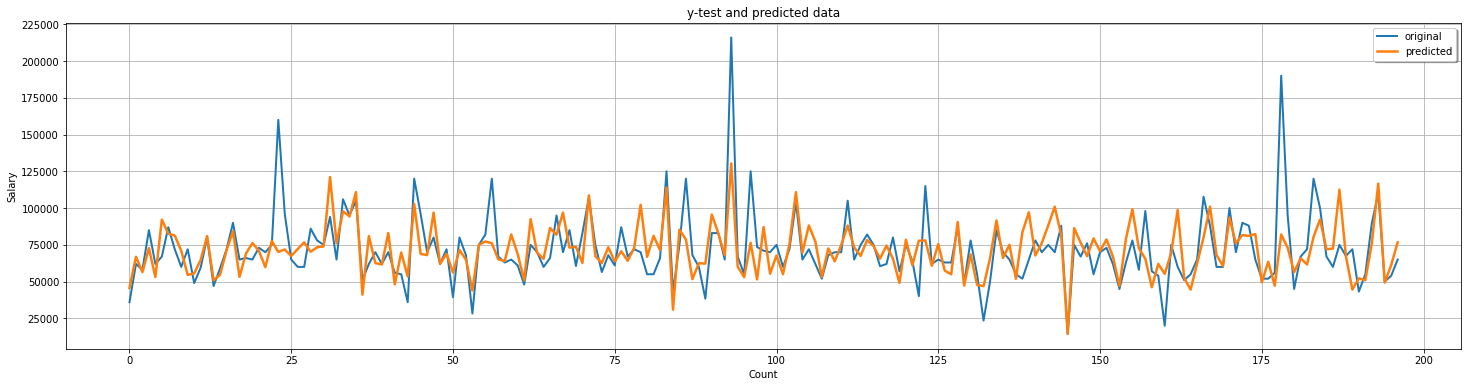

In [131]:
x_ax = range(len(y_test_lb))
plt.figure(figsize=(25, 6))
plt.plot(x_ax, y_test_lb, linewidth=2, label="original")
plt.plot(x_ax, predict_lb_rdf, linewidth=2.5, label="predicted")
plt.title("y-test and predicted data")
plt.xlabel('Count')
plt.ylabel('Salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### 5.3. Boosting techniques

#### 5.3.1. Gradient Boosting Regression

##### 5.3.1.1. Apply model

In [132]:
# https://vitalflux.com/gradient-boosting-regression-python-examples/, https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
# Cach chon tham so: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
from sklearn import datasets, ensemble

param = {
    "n_estimators": 100,
    "max_depth": 6,
    "min_samples_split": 4,
    "learning_rate": 0.1,
    "loss": "ls",
    "subsample": 1
}

start = time.time()
gbr = ensemble.GradientBoostingRegressor(**param, random_state=6)
gbr.fit(X_train_lb, y_train_lb)
predict_lb_gbr = gbr.predict(X_test_lb)
end = time.time()

print('Điểm trên tập train: ', gbr.score(X_train_lb, y_train_lb))
print('Điểm trên tập test:', gbr.score(X_test_lb, y_test_lb))
print("Run time:", end - start, "s")

Điểm trên tập train:  0.8668004847390791
Điểm trên tập test: 0.3668829588995164
Run time: 0.13760948181152344 s


##### 5.3.1.2. Evaluate model

In [133]:
from sklearn.metrics import mean_absolute_error
mae_gbr = mean_absolute_error(y_test_lb, predict_lb_gbr)
print("MAE", mae_gbr)

MAE 12621.242339285927


In [134]:
from sklearn.metrics import mean_squared_error
mse_gbr = mean_squared_error(y_test_lb, predict_lb_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test_lb, predict_lb_gbr))
print("MSE", mse_gbr)
print("RMSE", rmse_gbr)

MSE 358291704.97277397
RMSE 18928.594902231227


In [135]:
from sklearn.metrics import r2_score
r2_gbr = r2_score(y_test_lb, predict_lb_gbr)
print(r2_gbr)

0.3668829588995164


In [136]:
pd.DataFrame({'y': y_test_lb, 'y_pre': predict_lb_gbr, 'diff': predict_lb_rdf - y_test_lb}).head(10)

,y,y_pre,diff
405,36000.0,41791.812904,9656.000000
295,62000.0,72525.970612,4864.000000
408,58000.0,50851.648571,-1530.000000
907,85000.0,73886.115131,-12186.666667
233,62000.0,54389.034662,-8942.250000
658,67000.0,81824.511815,25113.333333
17,87000.0,83994.470608,-4397.333333
445,72000.0,84589.337727,9284.000000
188,60000.0,73655.365891,10926.833333
55,72000.0,48042.304355,-17442.300000


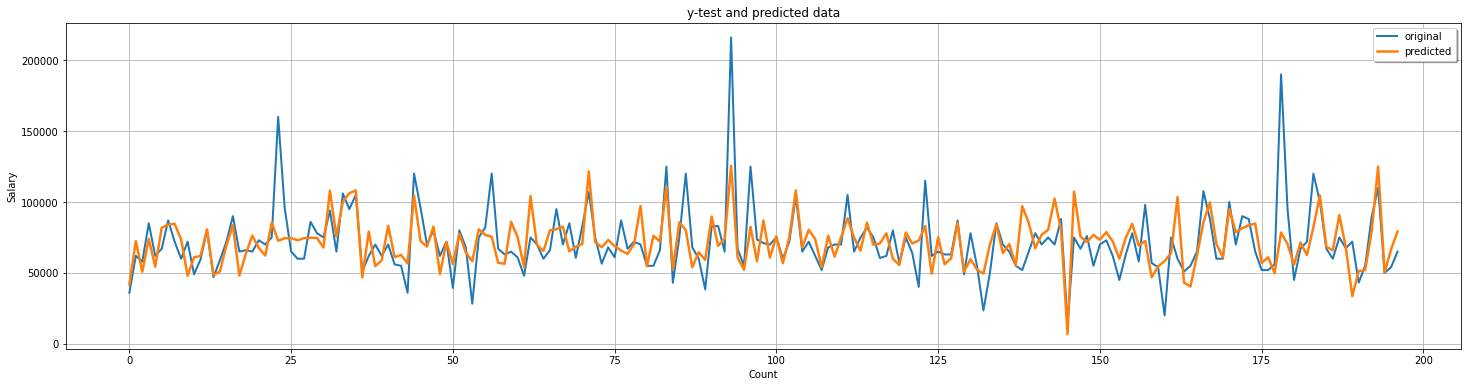

In [137]:
x_ax = range(len(y_test_lb))
plt.figure(figsize=(25, 6))
plt.plot(x_ax, y_test_lb, linewidth=2, label="original")
plt.plot(x_ax, predict_lb_gbr, linewidth=2.5, label="predicted")
plt.title("y-test and predicted data")
plt.xlabel('Count')
plt.ylabel('Salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#### 5.3.2. CatBoost Regressor

##### 5.3.2.1. Apply model

In [138]:
from catboost import CatBoostRegressor

start = time.time()
model_lb_cbr = CatBoostRegressor(random_state = 6)
model_lb_cbr.fit(X_train_lb, y_train_lb)
predict_lb_cbr = model_lb_cbr.predict(X_test_lb)
end = time.time()

print('Điểm trên tập train: ', model_lb_cbr.score(X_train_lb, y_train_lb))
print('Điểm trên tập test:', model_lb_cbr.score(X_test_lb, y_test_lb))
print("Run time:", end - start, "s")

Learning rate set to 0.039422
0:	learn: 23599.4110335	total: 221ms	remaining: 3m 41s
1:	learn: 23414.5890034	total: 223ms	remaining: 1m 51s
2:	learn: 23262.4309416	total: 224ms	remaining: 1m 14s
3:	learn: 23099.4631109	total: 225ms	remaining: 56.1s
4:	learn: 22927.4338689	total: 227ms	remaining: 45.2s
5:	learn: 22759.0129644	total: 229ms	remaining: 37.9s
6:	learn: 22640.5882631	total: 230ms	remaining: 32.6s
7:	learn: 22503.9807306	total: 231ms	remaining: 28.6s
8:	learn: 22380.8187254	total: 232ms	remaining: 25.5s
9:	learn: 22237.4755395	total: 233ms	remaining: 23.1s
10:	learn: 22125.7710854	total: 234ms	remaining: 21s
11:	learn: 22005.0867409	total: 235ms	remaining: 19.3s
12:	learn: 21873.1742298	total: 235ms	remaining: 17.9s
13:	learn: 21759.1291645	total: 236ms	remaining: 16.6s
14:	learn: 21676.9560089	total: 237ms	remaining: 15.6s
15:	learn: 21589.0222181	total: 238ms	remaining: 14.6s
16:	learn: 21512.9913978	total: 239ms	remaining: 13.8s
17:	learn: 21427.8247268	total: 240ms	remain

##### 5.3.2.2. Evaluate model

In [139]:
from sklearn.metrics import mean_absolute_error
mae_cbr = mean_absolute_error(y_test_lb, predict_lb_cbr)
print("MAE", mae_cbr)

MAE 12138.607924588685


In [140]:
from sklearn.metrics import mean_squared_error
mse_cbr = mean_squared_error(y_test_lb, predict_lb_cbr)
rmse_cbr = np.sqrt(mean_squared_error(y_test_lb, predict_lb_cbr))
print("MSE", mse_cbr)
print("RMSE", rmse_cbr)

MSE 355451742.7211332
RMSE 18853.42787720931


In [141]:
from sklearn.metrics import r2_score
r2_cbr = r2_score(y_test_lb, predict_lb_cbr)
print(r2_cbr)

0.3719012958373825


In [142]:
pd.DataFrame({'y': y_test_lb, 'y_pre': predict_lb_cbr, 'diff': predict_lb_cbr - y_test_lb}).head(10)

,y,y_pre,diff
405,36000.0,41981.073208,5981.073208
295,62000.0,69582.695663,7582.695663
408,58000.0,48368.857002,-9631.142998
907,85000.0,77861.757407,-7138.242593
233,62000.0,57913.236294,-4086.763706
658,67000.0,83088.680287,16088.680287
17,87000.0,82003.492196,-4996.507804
445,72000.0,76555.341575,4555.341575
188,60000.0,74054.382950,14054.382950
55,72000.0,52192.214248,-19807.785752


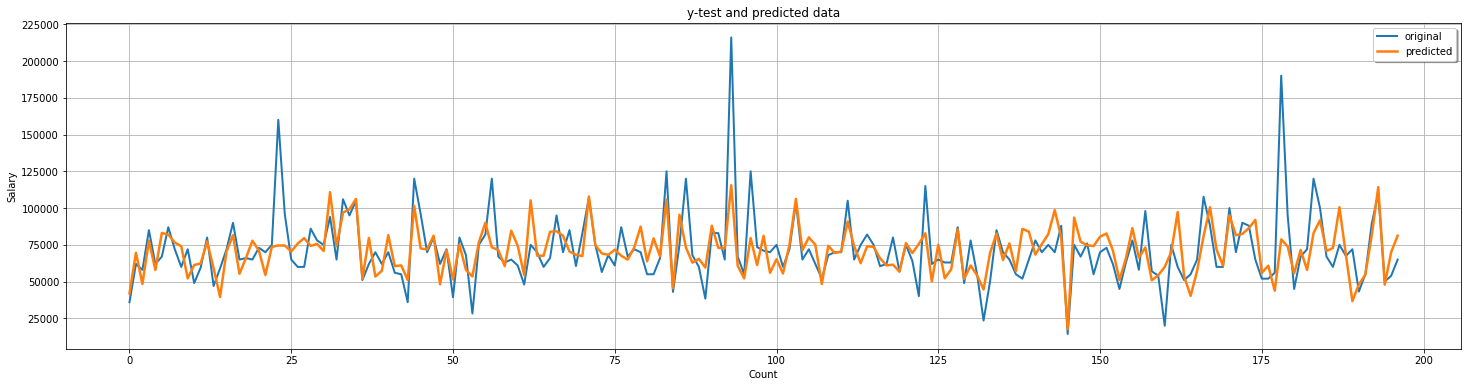

In [143]:
x_ax = range(len(y_test_lb))
plt.figure(figsize=(25, 6))
plt.plot(x_ax, y_test_lb, linewidth=2, label="original")
plt.plot(x_ax, predict_lb_cbr, linewidth=2.5, label="predicted")
plt.title("y-test and predicted data")
plt.xlabel('Count')
plt.ylabel('Salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#### 5.3.3. XGBoost

##### 5.3.3.1. Find params

In [144]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train_lb, label=y_train_lb)
dtest = xgb.DMatrix(X_test_lb, label=y_test_lb)

In [145]:
params = {}

In [146]:
from sklearn.metrics import mean_absolute_error
import numpy as np
# "Learn" the mean from the training data
mean_train = np.mean(y_train_lb)
# Get predictions on the test set
baseline_predictions = np.ones(y_test_lb.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test_lb, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 15833.03


In [147]:
params['eval_metric'] = "mae"
num_boost_round = 999
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:50350.97137
[1]	Test-mae:35587.95534
[2]	Test-mae:25631.51764
[3]	Test-mae:19114.88653
[4]	Test-mae:15554.68569
[5]	Test-mae:13610.38475
[6]	Test-mae:12643.18812
[7]	Test-mae:12475.34606
[8]	Test-mae:12397.32030
[9]	Test-mae:12515.61652
[10]	Test-mae:12662.59425
[11]	Test-mae:12817.80991
[12]	Test-mae:12810.85519
[13]	Test-mae:12645.19777
[14]	Test-mae:12631.02672
[15]	Test-mae:12665.98513
[16]	Test-mae:12663.78561
[17]	Test-mae:12728.36499


In [148]:
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best MAE: 12397.32 with 9 rounds


In [149]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=9,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,51112.393028,292.714414,51145.124187,1443.071333
1,36340.700556,150.821922,36498.293887,1116.482377
2,26347.481607,67.709668,26824.358498,654.614335
3,19648.355567,79.674039,20512.136536,486.119037
4,15433.306654,102.935598,16943.755400,513.465172
5,12956.163062,140.917827,15195.451347,620.789001
6,11506.823287,220.244462,14456.989070,566.384578
7,10676.684264,255.631192,14071.141866,588.966638
8,10180.860525,264.603644,14027.852520,653.392791


In [150]:
cv_results['test-mae-mean'].min()

14027.852519740689

In [151]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(10,12)
    for min_child_weight in range(1, 3)
]

In [152]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=12,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\t ==> MAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=10, min_child_weight=1
	 ==> MAE 14276.577906318658 for 9 rounds
CV with max_depth=10, min_child_weight=2
	 ==> MAE 14323.074724030352 for 8 rounds
CV with max_depth=11, min_child_weight=1
	 ==> MAE 14034.480699383468 for 9 rounds
CV with max_depth=11, min_child_weight=2
	 ==> MAE 14322.967605288917 for 9 rounds
Best params: 11, 1, MAE: 14034.480699383468


In [153]:
params['max_depth'] = 11
params['min_child_weight'] = 1

In [154]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,10)]
    for colsample in [i/10. for i in range(6,8)]
]

In [155]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=12,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\t ==> MAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=0.9, colsample=0.7
	 ==> MAE 14018.411479817762 for 11 rounds
CV with subsample=0.9, colsample=0.6
	 ==> MAE 14018.411479817762 for 11 rounds
CV with subsample=0.8, colsample=0.7
	 ==> MAE 14170.69726166458 for 13 rounds
CV with subsample=0.8, colsample=0.6
	 ==> MAE 14170.69726166458 for 13 rounds
CV with subsample=0.7, colsample=0.7
	 ==> MAE 14298.613149926237 for 14 rounds
CV with subsample=0.7, colsample=0.6
	 ==> MAE 14298.613149926237 for 14 rounds
Best params: 0.9, 0.7, MAE: 14018.411479817762


In [156]:
params['subsample'] = 0.9
params['colsample_bytree'] = 0.7

In [157]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [0.3, 0.2, 0.05, 0.02]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=12,
            nfold=5,
            metrics=['mae'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\t ==> MAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
	 ==> MAE 14018.411479817762 for 11 rounds

CV with eta=0.2
	 ==> MAE 13807.73912902404 for 16 rounds

CV with eta=0.05
	 ==> MAE 13519.715392492619 for 78 rounds

CV with eta=0.02
	 ==> MAE 13535.10108935968 for 197 rounds

Best params: 0.05, MAE: 13519.715392492619


In [158]:
params['eta'] = 0.05

In [159]:
params

{'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 1,
 'subsample': 0.9,
 'colsample_bytree': 0.7,
 'eta': 0.05}

##### 5.3.3.2. Apply model

In [160]:
# https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html
# tim ra tham so toi uu:  https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663
                        # https://towardsdatascience.com/what-is-xgboost-and-how-to-optimize-it-d3c24e0e41b4
                        # https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
import xgboost as xgb

params = {  
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 1,
 'subsample': 0.9,
 'colsample_bytree': 0.7,
 'eta': 0.05
}

start = time.time()
xgbr = xgb.XGBRegressor(**params, random_state=6)
xgbr.fit(X_train_lb, y_train_lb)
predict_lb_xgb = xgbr.predict(X_test_lb)
end = time.time()

print('Điểm trên tập train: ', xgbr.score(X_train_lb, y_train_lb))
print('Điểm trên tập test:', xgbr.score(X_test_lb, y_test_lb))
print("Run time:", end - start, "s")

Điểm trên tập train:  0.8707481057324954
Điểm trên tập test: 0.37037867888441156
Run time: 0.2840914726257324 s


##### 5.3.3.3. Evaluate model

In [161]:
from sklearn.metrics import mean_absolute_error
mae_xgb = mean_absolute_error(y_test_lb, predict_lb_xgb)
print("MAE", mae_xgb)

MAE 12425.489525499683


In [162]:
from sklearn.metrics import mean_squared_error
mse_xgb = mean_squared_error(y_test_lb, predict_lb_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test_lb, predict_lb_xgb))
print("MSE", mse_xgb)
print("RMSE", rmse_xgb)

MSE 356313417.5595677
RMSE 18876.26598561187


In [163]:
from sklearn.metrics import r2_score
r2_xgb = r2_score(y_test_lb, predict_lb_xgb)
print(r2_xgb)

0.37037867888441156


In [164]:
pd.DataFrame({'y': y_test_lb, 'y_pre': predict_lb_xgb, 'diff': predict_lb_xgb - y_test_lb}).head(10)

,y,y_pre,diff
405,36000.0,49086.632812,13086.632812
295,62000.0,65720.960938,3720.960938
408,58000.0,49935.421875,-8064.578125
907,85000.0,75475.429688,-9524.570312
233,62000.0,52771.367188,-9228.632812
658,67000.0,88241.867188,21241.867188
17,87000.0,80855.250000,-6144.750000
445,72000.0,79587.617188,7587.617188
188,60000.0,81950.296875,21950.296875
55,72000.0,56087.878906,-15912.121094


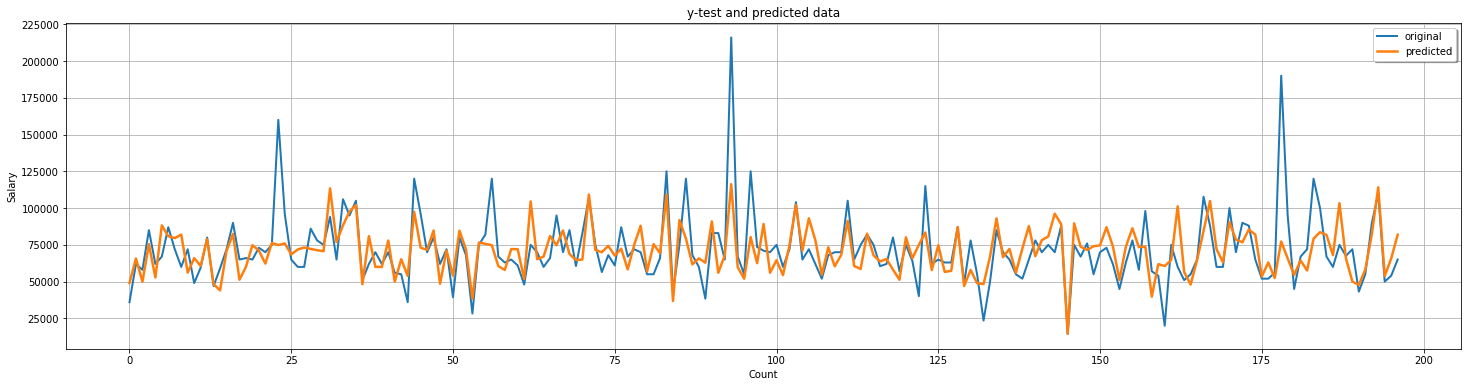

In [165]:
x_ax = range(len(y_test_lb))
plt.figure(figsize=(25, 6))
plt.plot(x_ax, y_test_lb, linewidth=2, label="original")
plt.plot(x_ax, predict_lb_xgb, linewidth=2.5, label="predicted")
plt.title("y-test and predicted data")
plt.xlabel('Count')
plt.ylabel('Salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

## 6. Compare models

### 6.1. By Model Evaluation Metrics

In [166]:
dtr = [mae_dtr, mse_dtr, rmse_dtr, r2_dtr]
br = [mae_br, mse_br, rmse_br, r2_br]
rdf = [mae_rdf, mse_rdf, rmse_rdf, r2_rdf]
gbr = [mae_gbr, mse_gbr, rmse_gbr, r2_gbr]
cbr = [mae_cbr, mse_cbr, rmse_cbr, r2_cbr]
xgb = [mae_xgb, mse_xgb, rmse_xgb, r2_xgb]

In [167]:
d = {'Decision Tree': dtr, 'Bagging': br, 'Random Forest': rdf, 'Gradient Boosting': gbr, 'CatBoost': cbr, 'XGBoost': xgb}
pd.DataFrame(data=d, index=['MAE', 'MSE', 'RMSE', 'R2'])

,Decision Tree,Bagging,Random Forest,Gradient Boosting,CatBoost,XGBoost
MAE,1.672811e+04,1.226367e+04,1.239311e+04,1.262124e+04,1.213861e+04,1.242549e+04
MSE,5.467409e+08,3.501456e+08,3.554029e+08,3.582917e+08,3.554517e+08,3.563134e+08
RMSE,2.338249e+04,1.871218e+04,1.885213e+04,1.892859e+04,1.885343e+04,1.887627e+04
R2,3.388495e-02,3.812774e-01,3.719876e-01,3.668830e-01,3.719013e-01,3.703787e-01


### 6.2. By Visualization Models

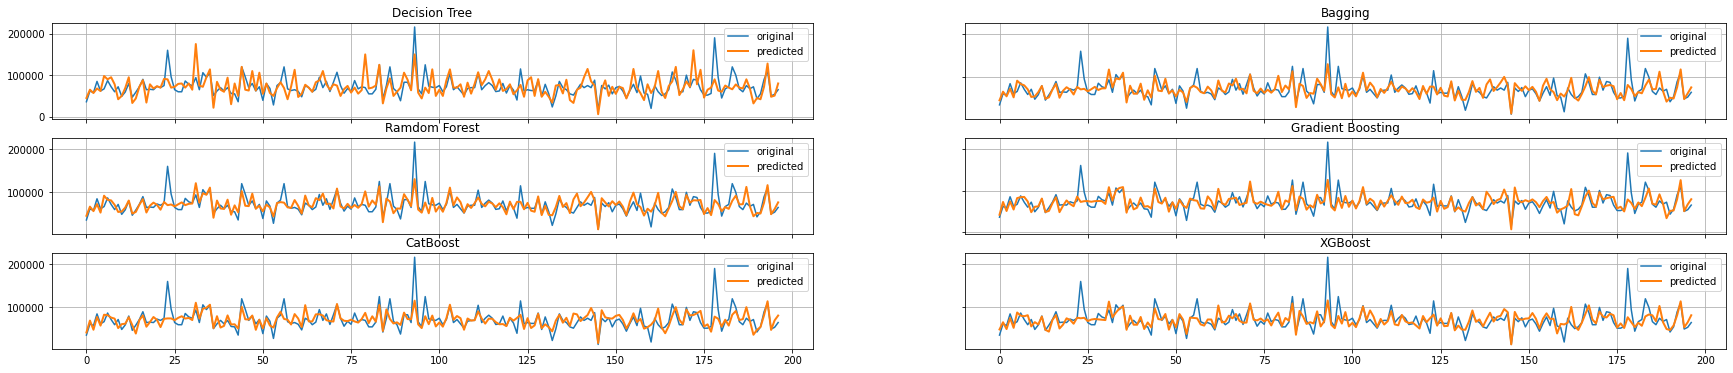

In [168]:
cols = [predict_lb, predict_lb_br, predict_lb_rdf, predict_lb_gbr, predict_lb_cbr, predict_lb_xgb]
name = ['Decision Tree', 'Bagging', 'Ramdom Forest', 'Gradient Boosting', 'CatBoost', 'XGBoost']
x_ax = range(len(y_test_lb))
# predict_lb_rdf

fig, ax = plt.subplots(3, 2, figsize=(30, 6))  
a = 0
for i in range(len(ax)): 
    for j in range(len(ax[i])):
        ax[i,j].set_title(name[a])
        ax[i,j].plot(x_ax, y_test_lb, linewidth=1.5, label="original")
        ax[i,j].plot(x_ax, cols[a], linewidth=2, label="predicted")
        ax[i,j].grid(True)
        ax[i, j].legend(loc="upper right")
        ax[i, j].label_outer()
        a = a + 1
plt.show() 

# VII. Deploy Models

## 1. Value Categorical After Encode

### 1.1. Gender

In [169]:
pd.DataFrame([cGenderEnc], columns=(cGender), index=['Gender Encoded'])

,Male,Female
Gender Encoded,1,0


### 1.2. Position

In [170]:
pd.DataFrame([cPositionEnc], columns=(cPosition), index=['Position Encoded']).T.sort_values(by=['Position Encoded'])

,Position Encoded
backend developer,0
backend developer & team lead,1
business analyst,2
cloud platform engineer,3
crypto developer,4
"cto (ceo, cfo)",5
data analyst,6
data engineer,7
data scientist,8
database developer (dba),9


### 1.3. Main Technology

In [171]:
pd.DataFrame([cMaintechEnc], columns=(cMaintech), index=['Main Tech Encoded']).T.sort_values(by=['Main Tech Encoded'])

,Main Tech Encoded
.net,0
abap,1
assembly,2
aws,3
azure,4
c/c++,5
cisco,6
clojure,7
cobol,8
elixir,9


## 2. Compute Predictions Using the Tkinter GUI

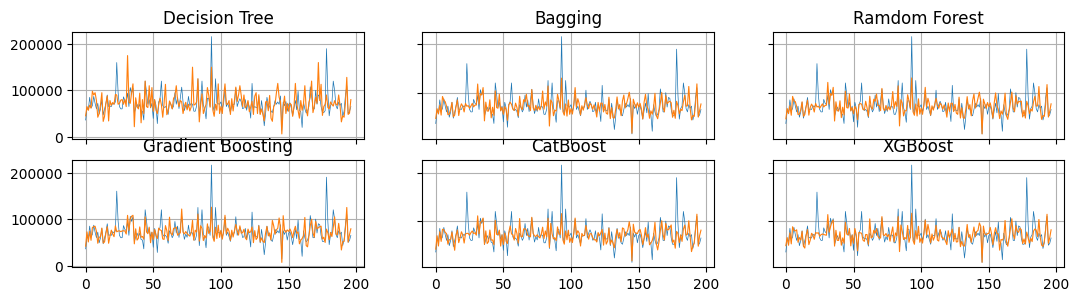

In [172]:
import tkinter as tk
from tkinter import *
from  tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# tkinter GUI
root= tk.Tk()
root.title('IT Salary Prediction')
canvas1 = tk.Canvas(root, width = 500, height = 350)
canvas1.pack()

# Age
label1 = tk.Label(root, text='Age:')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry(root)
canvas1.create_window(270, 100, window=entry1)

# GPA
label2 = tk.Label(root, text='             Years of experience:')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root)
canvas1.create_window(270, 120, window=entry2)

# work_experience
label3 = tk.Label(root, text='Gender:                      ')
canvas1.create_window(140, 140, window=label3)

entry3 = tk.Entry (root)
canvas1.create_window(270, 140, window=entry3)

# Age input
label4 = tk.Label(root, text='Position:                                  ')
canvas1.create_window(160, 160, window=label4)

entry4 = tk.Entry (root)
canvas1.create_window(270, 160, window=entry4)

# Age input
label5 = tk.Label(root, text='Main technology:                                ')
canvas1.create_window(180, 180, window=label5) 

entry5 = tk.Entry (root)
canvas1.create_window(270, 180, window=entry5)

def values(): 
    global age
    age = float(entry1.get()) 
    
    global yoe
    yoe = float(entry2.get()) 
    
    global gd
    gd = float(entry3.get()) 
    
    global po
    po = float(entry4.get()) 
    
    global mt
    mt = float(entry5.get()) 
    
    # Prediction_result  = ('Predicted Result: ', model_lb_rdf.predict([[age, yoe, gd, po, mt]]), xgbr.predict(np.matrix([age, yoe, gd, po, mt])))
    # label_Prediction = tk.Label(root, text= Prediction_result)
    # canvas1.create_window(270, 280, window=label_Prediction)
    
    ws = Tk()
    ws.title('Predicted Results')
    ws.geometry('400x200')

    set = ttk.Treeview(ws)
    set.pack()

    set['columns']= ('full_Name','score')
    set.column("#0", width=0,  stretch=NO)
    set.column("full_Name",anchor=CENTER, width=200)
    set.column("score",anchor=CENTER, width=200)

    set.heading("#0",text="",anchor=CENTER)
    set.heading("full_Name",text="Model",anchor=CENTER)
    set.heading("score",text="Predicted Salary",anchor=CENTER)

    set.insert(parent='',index='end',iid=0,text='', values=('Decision Tree', model_lb.predict([[age, yoe, gd, po, mt]])))
    set.insert(parent='',index='end',iid=1,text='', values=('Bagging', model_br.predict([[age, yoe, gd, po, mt]])))
    set.insert(parent='',index='end',iid=2,text='', values=('Random Forest', model_lb_rdf.predict([[age, yoe, gd, po, mt]])))
    set.insert(parent='',index='end',iid=3,text='', values=('Gradient Boosting', gbr.predict(np.matrix([age, yoe, gd, po, mt]))))
    set.insert(parent='',index='end',iid=4,text='', values=('CatBoost', model_lb_cbr.predict([[age, yoe, gd, po, mt]])))
    set.insert(parent='',index='end',iid=5,text='', values=('XGB', xgbr.predict(np.matrix([age, yoe, gd, po, mt])))) 
    
button1 = tk.Button(root, text='Predict Salary IT',command=values, bg='orange', fg='black')
canvas1.create_window(270, 220, window=button1)

cols = [predict_lb, predict_lb_br, predict_lb_rdf, predict_lb_gbr, predict_lb_cbr, predict_lb_xgb]
name = ['Decision Tree', 'Bagging', 'Ramdom Forest', 'Gradient Boosting', 'CatBoost', 'XGBoost']
x_ax = range(len(y_test_lb))
# plt.rcParams.update({'font.size': 6,})
fig, ax = plt.subplots(2, 3, figsize=(20, 10), dpi=100)
a = 0
for i in range(len(ax)): 
    for j in range(len(ax[i])):
        ax[i,j].set_title(name[a])
        ax[i,j].plot(x_ax, y_test_lb, linewidth=0.5)
        ax[i,j].plot(x_ax, cols[a], linewidth=0.8)
        ax[i,j].grid(True)
        ax[i,j].label_outer()
        a = a + 1
scatter3 = FigureCanvasTkAgg(fig, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
 
root.mainloop()